# Ноутбук с ОТВЕТАМИ

Этот ноутбук представляет собой набор практических заданий по работе с библиотекой pandas, построенных на датасете продаж Superstore. 

В качестве источника данных используется открытый датасет 
[Superstore Dataset (Final)](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final), 
опубликованный на платформе Kaggle.

При выполнении заданий рекомендуется в следующем порядке:
1) сначала попытаться решить задачу самостоятельно в файле `tasks.ipynb`,
2) затем воспользоваться подсказкой,
3) и только при необходимости обращаться к решениям в ноутбуке `tasks_solution.ipynb`.

# 📑Оглавление
- [1. Библиотеки и функции](#1.-Библиотеки-и-функции)
- [2. Предобработка данных](#2.-Предобработка-данных)
- [3. Разведочный анализ](#3.-Разведочный-анализ)
- [4. Анализ продаж во времени](#4.-Анализ-продаж-во-времени)
- [5. RFM анализ](#5.-RFM-анализ)
- [6. Когортный анализ](#6.-Когортный-анализ)

## 1. Библиотеки и функции

### 1.1 Импорт библиотек
Импортируйте следующие библиотеки с соответствующими алиасами:
- numpy (np)
- pandas (pd)
- matplotlib.pyplot (plt)
- matplotlib.dates (mdates)
- seaborn (sns)

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### 1.2 Функция для будущих графиков
Напишите функцию `create_fig`, которая принимает размеры изображения `x` и `y` (по умолчанию 5 × 5), создаёт пустую фигуру с осями и возвращает объекты `fig` и `ax`

Примечание: данную функцию мы будем часто использовать для быстрого создания графиков

In [2]:
# функция для быстрого создания графиков
def create_fig(x=5, y=5):
    fig = plt.figure(figsize=(x,y)) # создаем фигуру
    ax = fig.add_axes([0, 0, 1, 1]) # создаем оси к фигуре
    return fig, ax

## 2. Предобработка данных

### 2.1 Путь к файлу

Создайте переменную `path_to_original_file` и запишите в неё путь к файлу `Sample - Superstore.csv`.

In [3]:
# путь к исходному датасету
path_to_original_file = 'Sample - Superstore.csv'

### 2.2 Чтение файла

Считайте CSV-файл по указанному пути в DataFrame `df`

<details>
<summary><b>Подсказка</b></summary>

Не забудьте указать правильную кодировку (`encoding`) и разделитель (`sep`) при чтении CSV-файла.
</details>

In [4]:
# чтение датасета
df = pd.read_csv(path_to_original_file, sep=',', encoding='windows-1252')

### 2.3 Информация о датафрейме

Выведите общую информацию о `df`

<details>
<summary><b>Подсказка</b></summary>

Примените метод `info()` к датафрейму
</details>

In [5]:
# информация по датафрейму
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### 2.4 Количество столбцов
Выведите количество строк и столбцов датафрейма в виде кортежа

<details>
<summary><b>Подсказка</b></summary>

Воспользуйтесь атрибутом `shape` датафрейма
</details>

In [6]:
# количество строк и столбцов
df.shape

(9994, 21)

### 2.5 Количество строк

Выведите количество строк датафрейма с использованием функции `len`

In [7]:
# количество строк с помощью len()
len(df)

9994

### 2.6 Первые строки

Выведите первые три строки датафрейма.

<details>
<summary><b>Подсказка</b></summary>

Примените метод `head()` к датафрейму
</details>

In [8]:
# первые три строки датафрейма
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### 2.7 Последние строки
Выведите последние четыре строки датафрейма.

<details>
<summary><b>Подсказка</b></summary>

Примените метод `tail()` к датафрейму
</details>

In [9]:
# последние четыре строки датафрейма
df.tail(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


### 2.8 Срез
Выведите 56-60 строки.

<details>
<summary><b>Подсказка</b></summary>

Используйте срез строк датафрейма по индексам:  
`df[start:stop]`

Обратите внимание, что правая граница среза **не включается**.
</details>

In [10]:
# срез
df[55:60]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
55,56,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,6,0.0,52.1400
56,57,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,5,0.0,15.5520
57,58,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.41,5,0.1,7.0980
58,59,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",14.56,2,0.0,6.9888
59,60,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,TEC-AC-10002167,Technology,Accessories,Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive,30.00,2,0.0,3.3000


### 2.9 Определенные строки и колонки (Часть 1)
Используя `iloc`, извлеките строки с индексами с 1 по 6 и первые 7 колонок

In [11]:
# iloc
df.iloc[1:7, :7]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman


### 2.10 Определенные строки и колонки (Часть 2)

Используя `loc`, извлеките строки с индексами с 1 по 6 и колонки: ['Customer Name', 'Postal Code']

In [12]:
# loc
df.loc[1:6, ['Customer Name', 'Postal Code']]

,Customer Name,Postal Code
1,Claire Gute,42420
2,Darrin Van Huff,90036
3,Sean O'Donnell,33311
4,Sean O'Donnell,33311
5,Brosina Hoffman,90032
6,Brosina Hoffman,90032


### 2.11 Уникальные значения
1) Определите, сколько различных значений содержится в колонке «Страна» (`Country`) во всём датасете.

<details>
<summary><b>Подсказка</b></summary>

Для подсчёта количества различных значений в столбце используйте метод  
`nunique()`.

Примените его к колонке со странами.
</details>

2) Выведите список стран, содержащихся в датафрейме.

<details>
<summary><b>Подсказка</b></summary>

Чтобы получить список уникальных значений столбца, используйте метод  
`unique()`.

Примените его к колонке со странами.
</details>

In [13]:
# число уникальных значений в колонке "Страна"
df['Country'].nunique()
# уникальные значения в колонке "Страна"
df['Country'].unique()

array(['United States'], dtype=object)

### 2.12 Удаление столбцов

Убедившись, что в колонке «Country» присутствует только одно уникальное значение,
**удалите** из DataFrame **колонки** `Row ID` и `Country`, так как они не несут дополнительной информации.

<details>
<summary><b>Подсказка</b></summary>

Для удаления одного или нескольких столбцов из датафрейма используйте метод  
`drop()` с параметром `columns`.

Не забудьте сохранить результат обратно в переменную `df` или использовать параметр `inplace=True`.
</details>

In [14]:
# убираем колонки: номер строки; страна
df = df.drop(columns=['Row ID','Country'])

### 2.13 Пропуски

Теперь, подсчитайте количество пропущенных значений по каждой колонке.

<details>
<summary><b>Подсказка</b></summary>

Чтобы определить количество пропущенных значений:
1. Используйте метод `isna()` для поиска пропусков.
2. Примените `sum()`, чтобы посчитать их количество по столбцам.
</details>

In [15]:
# подсчитываем количество пропущенных значений
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 2.14 Колонки

Выведите наименования всех колонок датафрейма. 

<details>
<summary><b>Подсказка</b></summary>

Атрибут `columns`

</details>

In [16]:
# наименования колонок
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

### 2.15 Переименование колонок (Часть 1)
Переименуйте название колонок ['Order ID', 'Order Date'] на ['order_id', 'order_date'].

<details>
<summary><b>Подсказка</b></summary>

Метод `rename(columns=)`

</details>

In [17]:
# переименование
df.rename(columns={'Order ID':'order_id', 'Order Date':'order_date'}, inplace=True)

### 2.16 Переименование колонок (Часть 2)
Приведите имена всех колонок DataFrame к единому стилю:

- переведите все символы в нижний регистр;

- замените пробелы в названиях колонок на символ подчёркивания (_).

Постарайтесь не использовать `rename()` с ручным перечислением колонок.

<details>
<summary><b>Подсказка</b></summary>
Измените значение `df.columns`, применив `генеративный список` и `цепочку методов` к каждому имени колонки.

</details>

In [18]:
# допишите код
df.columns = [name_col.lower().replace(' ', '_') for name_col in df.columns]

### 2.17 Изменение типа данных

Проверьте и приведите столбцы `order_date` и `ship_date` к типу `datetime`

<details>
<summary><b>Подсказка</b></summary>
Столбцы с датами часто считываются как строки (object).
Чтобы работать с ними как с датами (извлекать год, месяц, считать разницу дат),
нужно привести их к типу datetime.

Используйте функцию `pd.to_datetime()` и примените её к нужным колонкам датафрейма.

</details>

In [19]:
# преобразуем тип данных у колонок, содержащие даты
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

### 2.18 Новая колонка

Создайте новый столбец `duration_ship`, отражающий длительность доставки в днях.  
Значение столбца должно рассчитываться как разница между датами отгрузки (`ship_date`) и заказа (`order_date`).

Вставьте столбец `duration_ship` на **четвёртую позицию** в DataFrame, используя метод `insert()`.

**Примечание:**  
При использовании `insert` необходимо указать:
- позицию столбца, куда он будет добавлен;
- имя нового столбца;
- выражение для расчёта значений столбца.

In [20]:
# продолжительность доставки в днях
df.insert(3, 'duration_ship', df['ship_date'] - df['order_date'])

### 2.19 Число уникальных значений
Посчитайте число уникальных клиентов.

<details>
<summary><b>Подсказка</b></summary>

Для подсчёта количества различных значений в столбце используйте метод  
`nunique()`.

Примените его к колонке `customer_id`.
</details>

In [21]:
# число уникальных клиентов
df['customer_id'].nunique()

793

### 2.20 Уникальные значения

Выведите список уникальных значений в колонке `segment`

<details>
<summary><b>Подсказка</b></summary>
    
Чтобы получить список уникальных значений столбца, используйте метод  
`unique()`.

Примените его к колонке `segment`
</details>

In [22]:
# список сегментов
df['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

### **2.21** Проверка на дурака (Часть 1)
Проверим, нет ли ошибок в наших данных. 

Посчитайте количество строк, где количество `quantity` меньше нуля.

<details>
<summary><b>Подсказка</b></summary>

Нужно отфильтровать строки, где значение в колонке `quantity` меньше нуля,  
и посчитать количество таких строк.

Вы можете:
- использовать булеву индексацию `df[условие]`, либо метод `query()`,
- а затем применить `len()` к результату.

</details>

In [23]:
# количество строк, где quantity меньше нуля
len(df[df['quantity']<0])

0

### **2.22** Проверка на дурака (Часть 2)
Проверим, нет ли ошибок в наших данных. 

Посчитайте количество строк, где дата доставки меньше чем дата заказа

<details>
<summary><b>Подсказка</b></summary>

Сравните две колонки с датами:  
`ship_date` и `order_date`.

Используйте логическое сравнение столбцов и подсчёт строк результата.

</details>

In [24]:
# количество строк, где дата доставки меньше чем дата заказа
len(df[df['ship_date'] < df['order_date']])

0

### **2.23** Статистика
Определите дату первого заказа и дату последнего заказа.

<details>
<summary><b>Подсказка</b></summary>

метод `describe()` по колонке

</details>

In [25]:
# статистика
df['order_date'].describe() 

count                             9994
mean     2016-04-30 00:07:12.259355648
min                2014-01-03 00:00:00
25%                2015-05-23 00:00:00
50%                2016-06-26 00:00:00
75%                2017-05-14 00:00:00
max                2017-12-30 00:00:00
Name: order_date, dtype: object

## 3. Разведочный анализ

### 3.1 Series
Посчитать общую выручку и прибыль (**выполняйте последовательно**)

**Шаг 1**

Посчитайте общую выручку и прибыль в Series `total_metrics`, приведя полученные значения к целому типу

<details>
<summary><b>Подсказка</b></summary>

Используйте:
- выбор нескольких колонок датафрейма (Пример: `df[[col1, col2]]`);
- метод `sum()` для агрегации;
- метод `astype(int)` для приведения типа.

Результатом должна быть `Series` с двумя значениями.
</details>

In [26]:
# выручка и прибыль
total_metrics = df[['sales', 'profit']].sum().astype(int)

**Шаг 2**

Используя атрибут `name` у Series `total_metrics` присвойте значение 'Общие метрики, $'

In [27]:
# атрибут name
total_metrics.name = 'Общие метрики, $'

**Шаг 3**

Используя атрибут `index` у Series `total_metrics` присвойте значение ['Выручка', 'Прибыль']

In [28]:
# атрибут index
total_metrics.index = ['Выручка', 'Прибыль']

**Шаг 4** 

Выведите Series `total_metrics` с помощью `print()`

In [29]:
# print
print(total_metrics)

Выручка    2297200
Прибыль     286397
Name: Общие метрики, $, dtype: int64


### 3.2 Среднее
Посчитать среднюю прибыль и медианную прибыль (**выполняйте последовательно**)

**Шаг 1**

Посчитать среднюю прибыль и медианную прибыль.

<details>
<summary><b>Подсказка</b></summary>

Используйте метод `describe()`

</details>

In [30]:
# среднее
df['profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: profit, dtype: float64

**Шаг 2** 

Рассчитайте `среднюю` и `медианную` прибыль отдельно для `каждого` клиентского `сегмента`.

Для этого сгруппируйте данные по столбцу `segment` и получите основные статистики по прибыли.

Убедитесь, что столбец `segment` остаётся `обычной колонкой`, а не индексом.

Сохраните результат в переменную `avg_profit_segment`.

<details>
<summary><b>Подсказка</b></summary>

1. Сначала сгруппируйте датафрейм по столбцу `segment`. Обратите внимание на параметр `as_index`, чтобы сегмент не стал индексом.
2. Выберите столбец с прибылью.
3. Примените метод `describe()` для получения средней, медианы и других статистик.

</details>

In [31]:
# среднее по сегментам
avg_profit_segment = df.groupby('segment', as_index=False)['profit'].describe()

### 3.3 Объединение таблиц

Получите таблицу, состоящую из заказов, которые входят в топ 10 заказов по выручке И в топ 10 заказов по прибыли (**выполняйте последовательно**)

**Шаг 1** 

Сформируйте новую таблицу `df_orders`, в которой каждая строка соответствует одному заказу.
Для каждого заказа необходимо:

- посчитать общую выручку по заказу и сохранить её в колонку `order_sales`;

- посчитать общую прибыль по заказу и сохранить её в колонку `order_profit`.

Группировку выполняйте по `order_id`. Колонка с номером заказа `не должна быть индексом` в итоговой таблице.

<details> 
<summary><b>Подсказка</b></summary>

Для решения задачи можно использовать следующие методы:

`groupby()` — чтобы сгруппировать строки по номеру заказа. Параметр `as_index=False` — чтобы номер заказа остался обычным столбцом, а не индексом;

`agg()` — чтобы одновременно посчитать сумму выручки и прибыли;

`rename()` — чтобы задать понятные имена новым колонкам;

Итоговая таблица должна содержать три колонки:
`order_id`, `order_sales`, `order_profit`.

</details>

In [32]:
# таблица с выручкой и прибылью по заказам
df_orders = (
    df
        .groupby('order_id', as_index=False) # группируем по заказам
        .agg({'sales':'sum', 'profit':'sum'}) # подсчитываем сумму продаж/прибыли
        .rename(columns={'sales':'order_sales', 'profit':'order_profit'}) # переименовываем подсчитываемые колонки
)

**Шаг 2** 

Получите таблицу с топ-10 заказов по выручке и запишите её в `df_top_sales`.

Не забудьте убрать колонку с прибылью по заказам.

<details> 
<summary><b>Подсказка</b></summary>

Для получения топ-10 заказов по выручке можно действовать последовательно:

- `drop(columns=...)` — чтобы удалить колонку с прибылью, если она не нужна на этом шаге;
- `sort_values()` — чтобы отсортировать заказы по выручке в порядке убывания;
- `ascending=False` — для сортировки от большего к меньшему;
- `head(10)` — чтобы оставить только первые 10 строк.

Результат сохраните в отдельную таблицу `df_top_sales`.

</details>

In [33]:
# отражаем топ 10 заказов по выручке
df_top_sales = df_orders.drop(columns='order_profit').sort_values('order_sales', ascending=False).head(10)

**Шаг 3**

Получите таблицу с **топ-10 заказов по прибыли** и запишите её в `df_top_profit`.

Не забудьте убрать колонку с выручкой по заказам.

<details>
<summary><b>Подсказка</b></summary>

Для получения топ-10 заказов по прибыли можно действовать последовательно:

- `drop(columns=...)` — чтобы удалить колонку с выручкой, если она не нужна на этом шаге;
- `sort_values()` — чтобы отсортировать заказы по прибыли в порядке убывания;
- `ascending=False` — для сортировки от большего к меньшему;
- `head(10)` — чтобы оставить только первые 10 строк.

Результат сохраните в отдельную таблицу `df_top_profit`.

</details>

In [34]:
# отражаем топ 10 заказов по прибыли
df_top_profit = df_orders.drop(columns='order_sales').sort_values('order_profit', ascending=False).head(10)

**Шаг 4**

Найдите заказы, которые **одновременно входят**  
в топ-10 по выручке (`df_top_sales`) и в топ-10 по прибыли (`df_top_profit`).

Полученную таблицу сохраните в переменную `df_top_orders`.

<details>
<summary><b>Подсказка</b></summary>

Для объединения таблиц используйте метод `merge()`:

- объединяйте таблицы `df_top_sales` и `df_top_profit`;
- используйте тип объединения `how='inner'`, чтобы оставить только общие заказы;
- укажите ключ объединения через параметр `on='order_id'`.

Результат сохраните в отдельную таблицу `df_top_orders`.

</details>

In [35]:
# топовые заказы
df_top_orders = df_top_sales.merge(df_top_profit, how='inner', on='order_id')

### 3.4 Агрегация

Посчитайте суммарную **выручку** и **прибыль** по каждой категории товаров (`category`).

Полученную таблицу сохраните в переменную `df_sales_category`.

⚠️ Колонку `category` **не оставляйте индексом** — она должна быть обычной колонкой.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте метод `groupby()` по колонке `category`;
- укажите параметр `as_index=False`, чтобы `category` осталась колонкой;
- примените метод `agg()` для подсчёта:
  - суммы продаж (`sales`);
  - суммы прибыли (`profit`).

Результат сохраните в таблицу `df_sales_category`.

</details>

In [36]:
# Продажи/Прибыль по категориям.
df_sales_category = df.groupby('category', as_index=False).agg({'sales':'sum', 'profit':'sum'})

### 3.5 Доля

Рассчитайте долю каждой категории товаров в общей выручке.

Для этого добавьте в таблицу `df_sales_category` новую колонку **`share_sales`**,  
которая показывает, какую часть от общей выручки составляет каждая категория.

⚠️ Значение доли должно рассчитываться как отношение выручки категории  
к суммарной выручке по всем категориям.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте колонку `sales` из таблицы `df_sales_category`;
- вычислите общую выручку с помощью метода `sum()`;
- разделите выручку каждой категории на общую выручку;
- результат запишите в новую колонку `share_sales`.

Изменения сохраните в таблице `df_sales_category`.

</details>

In [37]:
df_sales_category['share_sales'] = df_sales_category['sales'] / df_sales_category['sales'].sum()

### 3.6 Круговая диаграмма

Постройте круговую диаграмму долей продаж по категориям.

В этом задании нужно визуализировать, какую долю в общих продажах занимает каждая категория товаров.

**Выполните следующие шаги:**

1. Создайте фигуру и ось для графика, вызвав функцию `create_fig()`.  
   Сохраните результат в переменные `fig_sales_category` и `ax_sales_category`.

2. Постройте круговую диаграмму на оси `ax_sales_category`, используя метод `pie()`:
   - значения: `df_sales_category['sales']`
   - подписи сегментов: `labels=df_sales_category['category']`
   - подписи долей в процентах: `autopct='%1.1f%%'`
   - направление построения: по часовой стрелке (`counterclock=False`)

3. Добавьте заголовок графика с помощью `ax_sales_category.set_title()`:
   **«Доля продаж каждой категории»**.

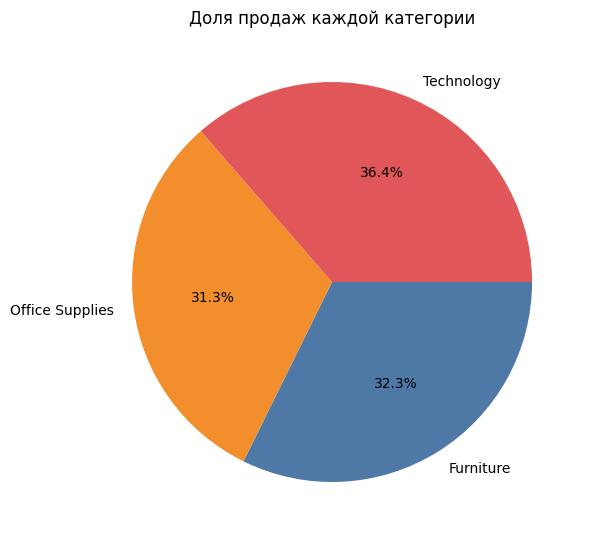

In [38]:
# Заготовка для графика
fig_sales_category, ax_sales_category = create_fig()

# Строим график
ax_sales_category.pie(df_sales_category['sales'], 
                      labels=df_sales_category['category'],
                      autopct='%1.1f%%',     # подписи в процентах
                      counterclock=False,    # по часовой стрелке
                      colors=['#4E79A7', '#F28E2B', '#E15759'] # цвета
)

# Название графика
ax_sales_category.set_title('Доля продаж каждой категории');

### 3.7 Агрегация (Часть 2)

Посчитайте суммарную **прибыль** по каждой подкатегории товаров (`sub-category`).

Полученную таблицу сохраните в переменную `df_subcat_profit`.

⚠️ Колонку `sub-category` **не оставляйте индексом** — она должна быть обычной колонкой.

Таблицу необходимо **отсортировать по возрастанию прибыли**
(от наименее прибыльных подкатегорий к наиболее прибыльным).

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте метод `groupby()` по колонке `sub-category`;
- укажите параметр `as_index=False`, чтобы `sub-category` осталась колонкой;
- примените метод `agg()` для подсчёта:
  - суммы прибыли (`profit`);
- отсортируйте результат с помощью `sort_values()` по колонке `profit`
  в порядке возрастания.

Результат сохраните в таблицу `df_subcat_profit`.

</details>

In [39]:
# Прибыль по сабкатегориям (от худшей к лучшей)
df_subcat_profit = (
    df
        .groupby(['sub-category'], as_index=False)
        .agg({'profit':'sum'})
        .sort_values('profit', ignore_index=True)
)

### 3.8 Горизонтальные столбчатые диаграммы

В этом задании вы построите **две горизонтальные столбчатые диаграммы**:
- **5 худших** сабкатегорий по прибыли (из начала `df_subcat_profit`)
- **5 лучших** сабкатегорий по прибыли (из конца `df_subcat_profit`)

Используйте датафрейм `df_subcat_profit`, полученный в задании **3.7**.

1. Создайте фигуру и **две оси** с помощью `plt.subplots(2, 1, figsize=(12, 8))`.
2. Сохраните результат в переменные:
   - `fig_subcat_profit`
   - `ax_subcat_profit`
3. Разверните массив осей в две переменные:
   - `ax_subcat_profit_worst`
   - `ax_subcat_profit_best`  
   (подсказка: используйте `ax_subcat_profit.flatten()`)
4. Постройте `sns.barplot()` со следующими параметрами:
   - `data`: `df_subcat_profit.head()`
   - `x`: `profit`
   - `y`: `sub-category`
   - `ax`: `ax_subcat_profit_worst`
   - `orient`: `'h'`
   - `color`: `'pink'`
5. Оформите оси:
   - заголовок: **"Худшие подкатегории"** (цвет заголовка — `red`)
   - подписи осей `x` и `y` уберите (`None`)
   - включите минорные тики по оси `x`

6. Постройте `sns.barplot()` со следующими параметрами:
   - `data`: `df_subcat_profit.tail()`
   - `x`: `profit`
   - `y`: `sub-category`
   - `ax`: `ax_subcat_profit_best`
   - `orient`: `'h'`
   - `color`: `'lightgreen'`

7. Оформите оси:
   - заголовок: **"Лучшие подкатегории"** (цвет заголовка — `green`)
   - подпись оси `y` уберите (`None`)
   - подпись оси `x` установите: **"Прибыль"**
   - включите минорные тики по оси `x`

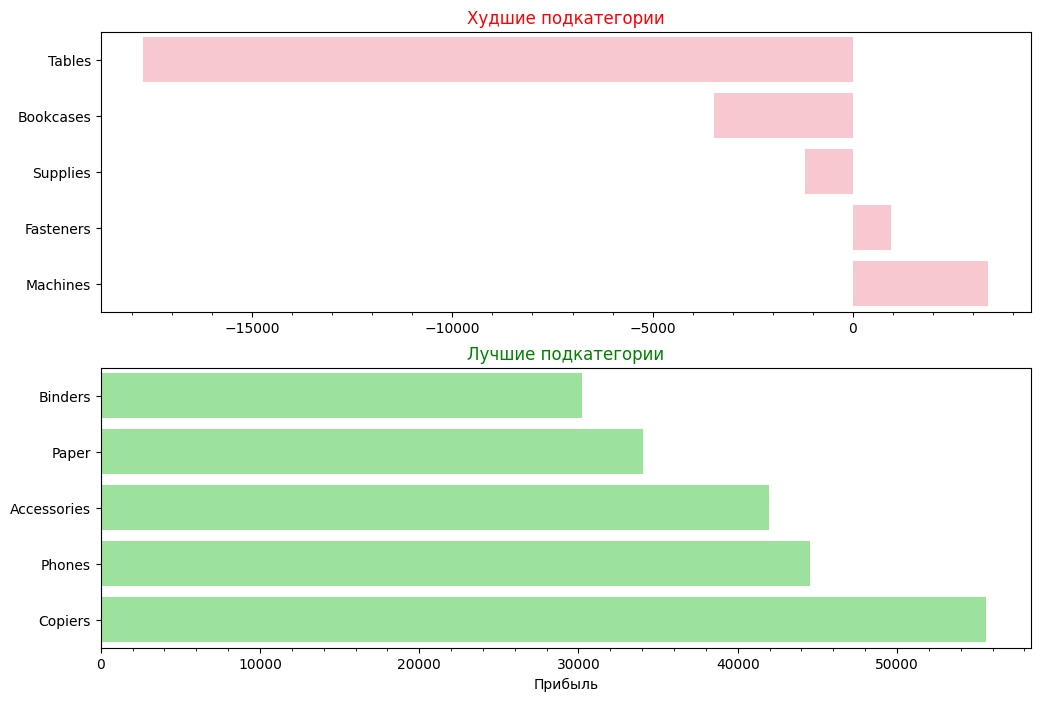

In [40]:
fig_subcat_profit, ax_subcat_profit = plt.subplots(2,1, figsize=(12,8))
ax_subcat_profit_worst, ax_subcat_profit_best = ax_subcat_profit.flatten()

sns.barplot(orient='h', data=df_subcat_profit.head(), x='profit', y='sub-category', ax=ax_subcat_profit_worst, color='pink')
sns.barplot(orient='h', data=df_subcat_profit.tail(), x='profit', y='sub-category', ax=ax_subcat_profit_best, color='lightgreen')

ax_subcat_profit_worst.set_title('Худшие подкатегории', color='red')
ax_subcat_profit_worst.set_ylabel(None)
ax_subcat_profit_worst.set_xlabel(None)
ax_subcat_profit_worst.xaxis.minorticks_on()

ax_subcat_profit_best.set_title('Лучшие подкатегории', color='green')
ax_subcat_profit_best.set_ylabel(None)
ax_subcat_profit_best.set_xlabel('Прибыль')
ax_subcat_profit_best.xaxis.minorticks_on();

### 3.9 Средний чек


В этом задании необходимо рассчитать **средний чек (AOV)** по подкатегориям товаров (`sub-category`).
Расчёт выполняйте **последовательно**, шаг за шагом.

**Шаг 1**

Сформируйте таблицу `df_aov_subcat`, в которой для каждой подкатегории рассчитаны:

- суммарные продажи;
- количество уникальных заказов.

Требования:
- группировку выполните по колонке `sub-category`;
- колонку `sub-category` **не оставляйте индексом** — она должна быть обычной колонкой.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте метод `groupby()` по колонке `sub-category`;
- укажите параметр `as_index=False`, чтобы подкатегория осталась колонкой;
- примените метод `agg()` для расчёта:
  - суммы продаж (`sales`);
  - количества уникальных заказов (`order_id` с функцией `nunique`).

Результат сохраните в таблицу `df_aov_subcat`.

</details>

In [41]:
df_aov_subcat = df.groupby('sub-category', as_index=False).agg({'sales':'sum', 'order_id':'nunique'})

**Шаг 2**

В таблице `df_aov_subcat` рассчитайте **средний чек** по каждой подкатегории и сохраните его в новую колонку `aov`.

Средний чек должен рассчитываться как:

> сумма продаж / количество уникальных заказов

Требования:
- значение среднего чека приведите к **целочисленному типу**.

<details>
<summary><b>Подсказка</b></summary>

Для расчёта среднего чека:

- разделите колонку `sales` на колонку `order_id`;
- результат запишите в новую колонку `aov`;
- при необходимости приведите тип данных с помощью `astype(int)`.

</details>

In [42]:
# Средний чек по подкатегориям
df_aov_subcat['aov'] = (df_aov_subcat['sales'] / df_aov_subcat['order_id']).astype(int)

**Шаг 3**

Отсортируйте таблицу `df_aov_subcat` по колонке `aov` **в порядке возрастания**.

В результате в начале таблицы должны оказаться подкатегории с наименьшим средним чеком.

<details>
<summary><b>Подсказка</b></summary>

Для сортировки:

- используйте метод `sort_values()` по колонке `aov`;
- сортировку выполните по возрастанию.

</details>

In [43]:
df_aov_subcat.sort_values('aov', inplace=True)

### 3.10 Агрегация (Часть 3)

Сформируйте таблицу `df_products` для анализа товаров.

Необходимо:

- сгруппировать данные по `product_id`;
- для каждого товара рассчитать:
  - общее количество проданных единиц (`quantity`);
  - суммарную выручку (`sales`);
  - суммарную прибыль (`profit`);
  - количество уникальных заказов, в которых участвовал товар;
- оставить только товары, которые встречаются **не менее чем в 5 заказах**;
- переименовать колонку с количеством заказов в `count_orders`;
- отсортировать товары **по убыванию количества заказов**;
- сбросить индекс итоговой таблицы.

Требования:
- колонка `product_id` **не должна быть индексом**.

Результат сохраните в таблицу `df_products`.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте `groupby()` по колонке `product_id` с параметром `as_index=False`;
- примените `agg()` для расчёта:
  - суммы `quantity`,
  - суммы `sales`,
  - суммы `profit`,
  - количества уникальных `order_id` через `nunique`;
- отфильтруйте товары с количеством заказов ≥ 5 с помощью `query()` или булевой фильтрации;
- переименуйте колонку с заказами через `rename()`;
- отсортируйте данные методом `sort_values()` по `count_orders` в порядке убывания;
- сбросьте индекс с помощью `reset_index(drop=True)`.

</details>

In [44]:
# анализируем товары
df_products = (
    df
        .groupby(['product_id'], as_index=False)
        .agg({'quantity':'sum', 'sales':'sum', 'profit':'sum', 'order_id':'nunique'})
        .query('order_id >= 5') # Оставляем товары, которые встречаются не менее, чем в пяти заказах
        .rename(columns={'order_id':'count_orders'})
        .sort_values('count_orders', ascending=False)
        .reset_index(drop=True)
)

### 3.11 Вертикальная столбчатая диаграмма

ТОП-5 наиболее часто встречающихся товаров.

Проанализируйте товары, которые **чаще всего встречаются в заказах**.

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика, вызвав функцию `create_fig(x=10, y=5)`.  
   Сохраните результат в переменные:
   - `fig_frequent_products`,
   - `ax_frequent_products`.

2. Постройте **столбчатую диаграмму** с помощью функции `sns.barplot`, указав:
   - `x='product_id'`,
   - `y='count_orders'`,
   - `data=df_products.head()`,
   - `ax=ax_frequent_products`,
   - `width=0.5`,
   - `color='lightblue'`.

3. Добавьте заголовок графика:
   - **«ТОП-5 наиболее часто встречаемых товаров в заказах»**.

4. Уберите подпись оси Y (количество заказов), оставив только подпись оси X:
   - ось X — **«Товары»**.

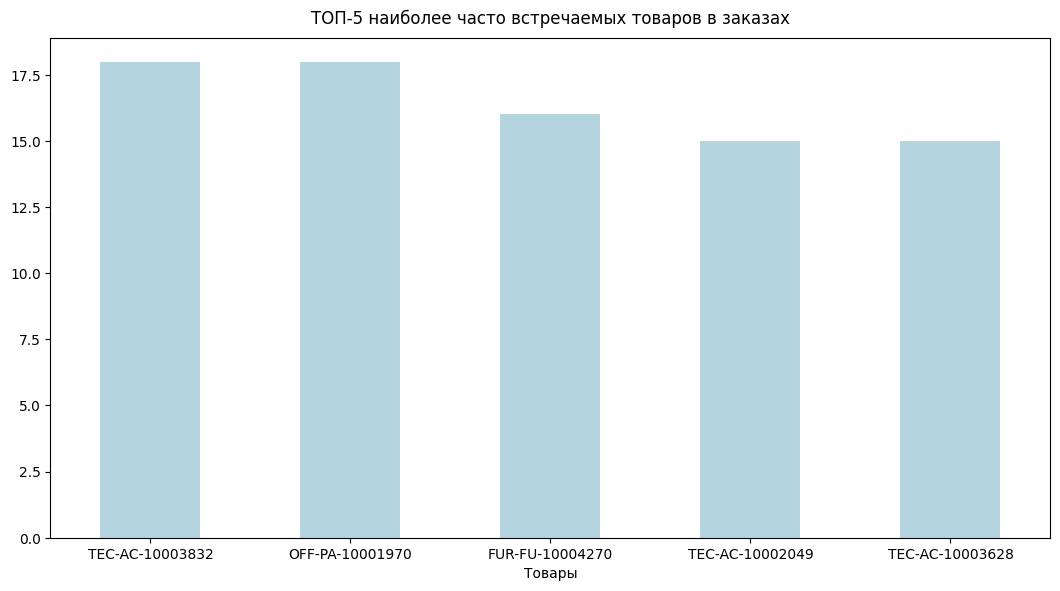

In [45]:
fig_frequent_products, ax_frequent_products = create_fig(x=10,y=5)
sns.barplot(data=df_products.head(), x='product_id', y='count_orders', ax=ax_frequent_products, width=0.5, color='lightblue')

ax_frequent_products.set_title('ТОП-5 наиболее часто встречаемых товаров в заказах', pad=10)
ax_frequent_products.set_ylabel(None)
ax_frequent_products.set_xlabel('Товары');

### 3.12 Нумерация
Для каждой подкатегории определите топ-3 товара по величине прибыли

**Шаг 1**

Сформируйте таблицу `df_profit`, в которой для каждой пары  
**`sub-category` – `product_id`** рассчитана **суммарная прибыль**.

Требования:
- выполните группировку по `sub-category` и `product_id`;
- рассчитайте сумму прибыли (`profit`);
- колонку `sub-category` **не оставляйте индексом** — она должна быть обычной колонкой.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте метод `groupby()` по колонкам `sub-category` и `product_id`;
- укажите параметр `as_index=False`, чтобы подкатегория осталась колонкой;
- примените метод `agg()` для подсчёта:
  - суммы прибыли (`profit`).

Результат сохраните в таблицу `df_profit`.

</details>

In [46]:
df_profit = (
    df
    .groupby(['sub-category', 'product_id'], as_index=False)
    .agg({'profit': 'sum'})
)

**Шаг 2**

Добавьте в таблицу `df_profit` новую колонку `position`,  
которая отражает **место товара по прибыли внутри своей подкатегории**.

Требования:
- ранжирование должно выполняться **внутри каждой подкатегории**;
- товары с большей прибылью должны получать **меньший номер позиции**;
- при равенстве значений используйте порядок появления.

<details>
<summary><b>Подсказка</b></summary>

Для этого:

- выполните группировку по `sub-category`;
- для колонки `profit` примените метод `rank()`:
  - `ascending=False` — для сортировки от большей прибыли к меньшей;
  - `method='first'` — чтобы избежать одинаковых позиций.

Колонку с результатом назовите `position`.

</details>


In [47]:
df_profit['position'] = df_profit.groupby('sub-category')['profit'].rank(method='first', ascending=False)

**Шаг 3**

Оставьте **ТОП-3 товара по прибыли** в каждой подкатегории.

Требования:
- сохраните записи, где `position ≤ 3`;
- отсортируйте результат по:
  - `sub-category`,
  - `position` (по возрастанию).

<details>
<summary><b>Подсказка</b></summary>

Для финального шага:

- отфильтруйте строки по условию `position <= 3`;
- используйте метод `sort_values()` для упорядочивания данных.

Итоговая таблица должна содержать только **три самых прибыльных товара в каждой подкатегории**.

</details>

In [48]:
df_profit.query('position <= 3').sort_values(['sub-category', 'position'])

,sub-category,product_id,profit,position
59,Accessories,TEC-AC-10002049,4425.3432,1.0
89,Accessories,TEC-AC-10003033,3085.0325,2.0
112,Accessories,TEC-AC-10003870,2243.9320,3.0
208,Appliances,OFF-AP-10002945,3247.0200,1.0
152,Appliances,OFF-AP-10000275,1653.8256,2.0
211,Appliances,OFF-AP-10003057,1503.5202,3.0
250,Art,OFF-AR-10000380,448.1640,1.0
313,Art,OFF-AR-10002135,310.8900,2.0
305,Art,OFF-AR-10001953,206.2662,3.0
545,Binders,OFF-BI-10003527,7753.0390,1.0


### 3.13 Числовая диаграмма

Постройте столбчатую диаграмму, показывающую, как часто встречаются различные размеры скидок.

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика с помощью функции `create_fig()`  
   и сохраните результат в переменные `fig_count_discount` и `ax_count_discount`.

2. Используя функцию `sns.countplot`, постройте график распределения скидок со следующими параметрами:
   - данные: колонка `discount` из датафрейма `df`;
   - ось X — размер скидки;
   - цвет столбцов: `red`;
   - ось для построения: `ax_count_discount`;
   - легенду отключите.

3. Добавьте заголовок графика:  
   **«Число встречаемых скидок»**,  
   размер шрифта — `14`, отступ — `5`.

4. Подпишите оси:
   - ось Y — **«Количество»**;
   - ось X — **«Размер скидки в сотых»**.

5. Для оси Y:
   - включите minor ticks;
   - добавьте сетку с прозрачностью `alpha=0.2`.

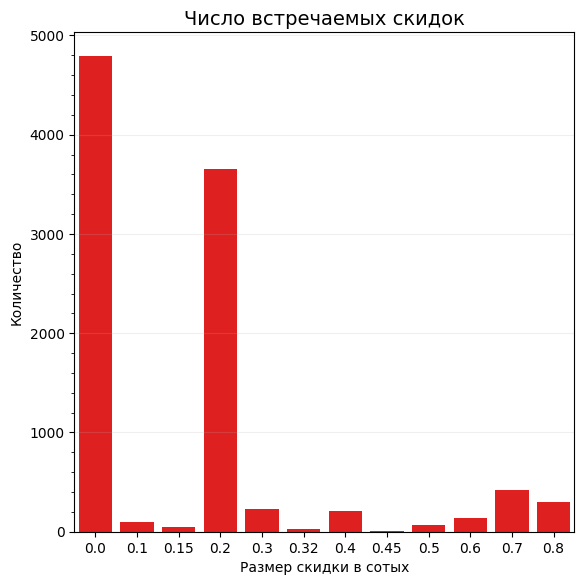

In [49]:
fig_count_discount, ax_count_discount = create_fig()
sns.countplot(
    x=df['discount'], 
    ax=ax_count_discount,
    color='red',
    legend=False
)

ax_count_discount.set_title('Число встречаемых скидок', fontsize=14, pad=5)
ax_count_discount.set_ylabel('Количество')
ax_count_discount.set_xlabel('Размер скидки в сотых')
ax_count_discount.yaxis.minorticks_on()
ax_count_discount.yaxis.grid(alpha=0.2);

## 4. Анализ продаж во времени

### 4.1 Новые колонки

Создать новые колонки:
- `order_year` (Извлечь год из даты заказа)
- `order_month` (Извлечь месяц из даты заказа)
- `order_dow` (Извлечь номер дня недели по ISO из даты заказа)
- `order_nwoy` (Извлечь номер недели в году из даты заказа)

<details>
<summary><b>Подсказка</b></summary>

Для извлечения временных признаков из даты можно использовать возможности pandas:

- атрибуты `.dt.year` и `.dt.month` — для года и месяца;
- метод `.apply(lambda d: d.isoweekday())` — для номера дня недели по ISO;
- метод `.dt.isocalendar().week` — для номера недели в году.

Все новые признаки создавайте на основе колонки `order_date`.

</details>

In [50]:
# Новые колонки
df['order_year'] = df['order_date'].dt.year # год заказа
df['order_month'] = df['order_date'].dt.month # номер месяца заказа
df['order_dow'] = df['order_date'].apply(lambda d: d.isoweekday())
df['order_nwoy'] = df['order_date'].dt.isocalendar().week # номер недели заказа в году

### 4.2 Агрегация

В этом задании необходимо рассчитать ключевые метрики продаж в разрезе **месяца каждого года** и подготовить временную колонку для дальнейшего анализа.

**Шаг 1**

Сформируйте датафрейм `df_metrics_year`, в котором для каждого месяца каждого года рассчитаны:

- суммарные продажи (`sales`);
- суммарная прибыль (`profit`);
- число уникальных заказов.

Требования:
- группировку выполните по колонкам `order_year` и `order_month`;
- количество уникальных заказов сохраните в колонку `count_orders`;
- колонки `order_year` и `order_month` **не должны быть индексом**.

<details>
<summary><b>Подсказка</b></summary>

Для выполнения этого шага:

- используйте метод `groupby()` по колонкам `order_year` и `order_month`;
- укажите параметр `as_index=False`, чтобы сохранить группирующие колонки обычными столбцами;
- примените метод `agg()` для расчёта:
  - суммы `sales`,
  - суммы `profit`,
  - количества уникальных `order_id` с помощью функции `nunique`;
- переименуйте колонку с количеством заказов в `count_orders`.

Результат сохраните в датафрейм `df_metrics_year`.

</details>

In [51]:
# Прибыль, продажи и число уникальных заказов в разрезе месяца каждого года
df_metrics_year = (
    df
        .groupby(['order_year', 'order_month'], as_index=False)
        .agg({'sales':'sum', 'profit':'sum', 'order_id':'nunique'})
        .rename(columns={'order_id':'count_orders'})
)

**Шаг 2**

Создайте колонку `period`, содержащую **дату начала месяца** для каждой записи.

Требования:
- дата должна формироваться на основе `order_year` и `order_month`;
- формат даты: `YYYY-MM-01` (например, `2014-01-01`);
- тип данных колонки — `datetime`.

<details>
<summary><b>Подсказка</b></summary>

Для создания временной колонки:

- используйте `pd.PeriodIndex.from_fields()`, передав в него значения года и месяца;
- укажите частоту `freq='M'`;
- преобразуйте результат в тип `datetime` с помощью метода `.to_timestamp()`;
- сохраните результат в новую колонку `period` датафрейма `df_metrics_year`.

</details>

In [52]:
df_metrics_year['period'] = pd.PeriodIndex.from_fields(
    year=df_metrics_year['order_year'],
    month=df_metrics_year['order_month'],
    freq='M'
).to_timestamp() # Создаем столбец с началом месяца каждого года

### 4.3 Линейные диаграммы

Постройте линейный график продаж и прибыли во времени (Сложность: Средняя)

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика, вызвав функцию  
   `create_fig(x=10, y=5)`.  
   Сохраните результат в переменные `fig_profit_and_sales_years` и `ax_profit_and_sales_years`.

2. С помощью `sns.lineplot()` постройте линейный график **продаж**:
   - данные: `df_metrics_year`
   - ось X: `period`
   - ось Y: `sales`
   - цвет линии: `grey`
   - маркер: `o`
   - используйте ранее созданную ось через параметр `ax`

3. На этой же оси постройте линейный график **прибыли**:
   - данные: `df_metrics_year`
   - ось X: `period`
   - ось Y: `profit`
   - маркер: `o`
   - используйте тот же параметр `ax`

4. Установите название оси X — **«Период»** с размером шрифта `12`.

5. Уберите подпись оси Y.

6. Включите отображение minor ticks по оси Y.

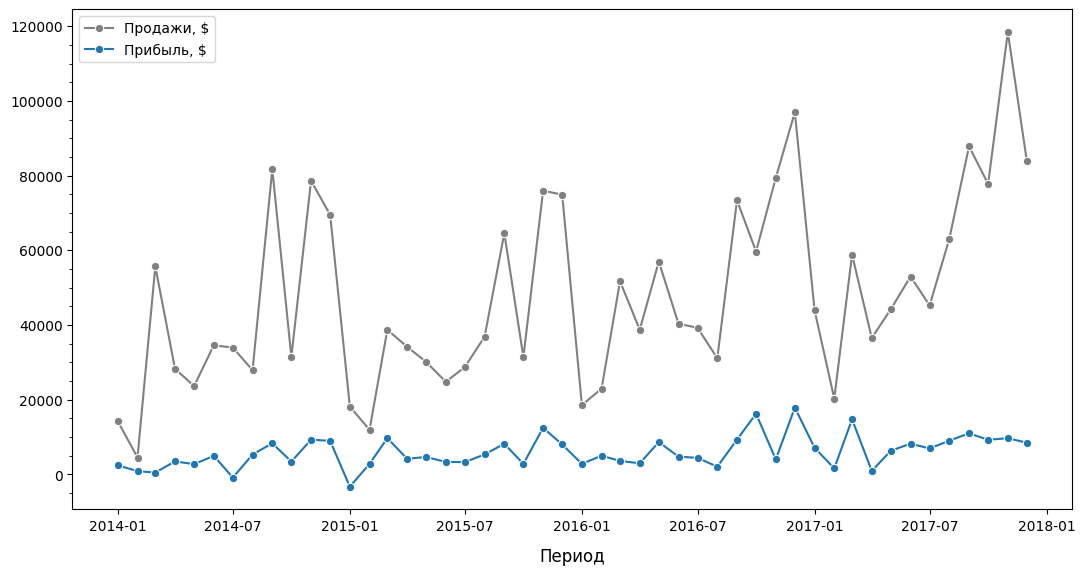

In [53]:
# График прибыли и продаж
fig_profit_and_sales_years, ax_profit_and_sales_years = create_fig(x=10)
sns.lineplot(
    data=df_metrics_year, 
    x='period', y='sales', 
    ax=ax_profit_and_sales_years, 
    label='Продажи, $',
    color='grey',
    marker='o'
)
sns.lineplot(
    data=df_metrics_year, 
    x='period', y='profit', 
    ax=ax_profit_and_sales_years, 
    label='Прибыль, $',
    marker='o'
)
ax_profit_and_sales_years.set_xlabel('Период', labelpad=10, fontsize=12);
ax_profit_and_sales_years.set_ylabel(None)
ax_profit_and_sales_years.yaxis.minorticks_on();

### 4.4 Линейные диаграммы (Часть 2)

Постройте линейный график числа заказов во времени

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика, вызвав функцию  
   `create_fig(x=10)`.  
   Сохраните результат в переменные `fig_distinct_orders_years` и `ax_distinct_orders_years`.

2. С помощью `sns.lineplot()` постройте линейный график **числа заказов**:
   - данные: `df_metrics_year`
   - ось X: `period`
   - ось Y: `count_orders`
   - цвет линии: `green`
   - используйте ранее созданную ось через параметр `ax`

3. Установите подписи осей:
   - ось X — **«Период»**, размер шрифта `12`, отступ `labelpad=10`
   - ось Y — **«Число заказов»**, размер шрифта `12`

4. Включите отображение minor ticks по оси Y и добавьте сетку:
   - `minor ticks` по оси Y
   - сетка по оси Y с прозрачностью `alpha=0.2`

5. Поверните подписи по оси X на `45` градусов.

6. Настройте отображение дат по оси X:
   - основной шаг — один раз в 3 месяца
   - формат даты: `год-краткое_название_месяца` (например, `2016-Oct`)

Примечание: для выполнения шага 6 используйте matplotlib.dates as `mdates`. Воспользуйтесь нейросетями)

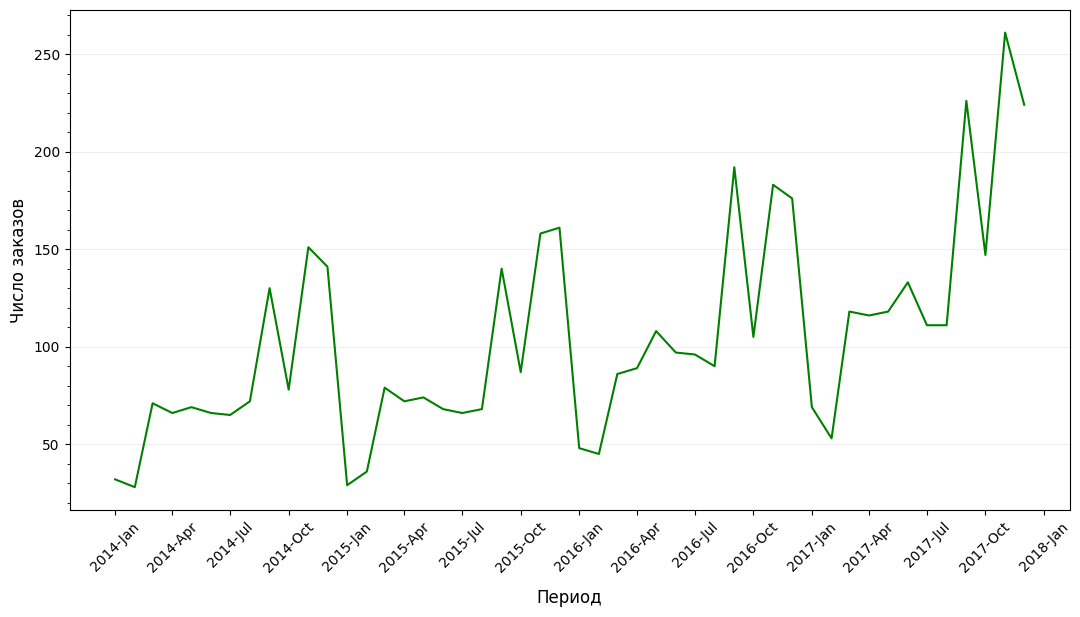

In [54]:
# Анализ числа заказов
fig_distinct_orders_years, ax_distinct_orders_years = create_fig(x=10)
sns.lineplot(data=df_metrics_year, x='period', y='count_orders', color='green')

ax_distinct_orders_years.set_xlabel('Период', labelpad=10, fontsize=12);
ax_distinct_orders_years.set_ylabel('Число заказов', fontsize=12)
ax_distinct_orders_years.yaxis.minorticks_on()
ax_distinct_orders_years.yaxis.grid(alpha=0.2)

ax_distinct_orders_years.tick_params(axis='x', rotation=45)
ax_distinct_orders_years.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # По кварталам
ax_distinct_orders_years.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) # Дата в формате Год - краткое название месяца

### 4.5 Агрегация (Часть 2)

В этом задании необходимо проанализировать **сезонность продаж по месяцам**, агрегировав данные **независимо от года**.

#### Выполните следующие шаги:

1. На основе датафрейма `df_metrics_year` выполните группировку по колонке `order_month`.
2. Для каждого месяца рассчитайте:
   - суммарные продажи (`sales`);
   - суммарную прибыль (`profit`);
   - общее количество заказов.
3. Переименуйте колонку `count_orders` в `total_orders`.
4. Убедитесь, что колонка месяца **не является индексом**.
5. Сохраните результат в датафрейм `df_season_months`.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи можно действовать следующим образом:

- используйте метод `groupby()` по колонке `order_month` с параметром `as_index=False`;
- примените метод `agg()` для подсчёта:
  - суммы `sales`,
  - суммы `profit`,
  - суммы `count_orders`;
- после агрегации переименуйте колонку с количеством заказов с помощью `rename()`;
- сохраните итоговый результат в датафрейм `df_season_months`.

</details>

In [55]:
# Анализируем продажи, прибыль и общее число заказов по месяцам
df_season_months= (
    df_metrics_year
        .groupby('order_month', as_index=False)
        .agg({'sales':'sum', 'profit':'sum', 'count_orders':'sum'})
        .rename(columns={'count_orders':'total_orders'})
)

### 4.6 Столбчатые диаграммы

Постройте сезонные графики по месяцам (3 диаграммы на одной фигуре) (Сложность: Высокая)

1. Создайте фигуру с сеткой осей **2×2** с параметрами:
   - `figsize=(12, 8)`
   - `sharex=True`

   Сохраните результат в переменные `fig_season_months` и `axs_season_months`.

2. «Распакуйте» оси в 4 переменные с помощью `flatten()`:
   - `ax_season_sales`, `ax_season_profit`, `ax_season_orders`, `ax_empty`

3. Постройте **3 столбчатые диаграммы** (seaborn `sns.barplot`) на созданных осях, используя данные `df_season_months`:
   
   **График 1 (0,0): продажи**
   - `x='order_month'`, `y='sales'`
   - ось: `ax=ax_season_sales`
   - цвет: `grey`
   - заголовок: `Продажи`
   - отключите подпись оси Y (`set_ylabel(None)`)

   **График 2 (0,1): прибыль**
   - `x='order_month'`, `y='profit'`
   - ось: `ax=ax_season_profit`
   - заголовок: `Прибыль`
   - отключите подпись оси Y

   **График 3 (1,0): число заказов**
   - `x='order_month'`, `y='total_orders'`
   - ось: `ax=ax_season_orders`
   - цвет: `green`
   - заголовок: `Число заказов`
   - отключите подпись оси Y
   - подпись оси X: `Месяц` (размер `fontsize=12`)

4. Для графика с заказами настройте подписи месяцев по оси X:
   - установите тики: `set_xticks(range(0, 12))`
   - установите подписи: `set_xticklabels(month_labels, fontsize=11)`

5. Четвёртую ось (ячейка 1,1) отключите:
   - `ax_empty.axis('off')`

In [56]:
month_labels = ['Янв','Фев','Мар','Апр','Май','Июн',
                'Июл','Авг','Сен','Окт','Ноя','Дек'] # список наименований месяцев для подписи на графике

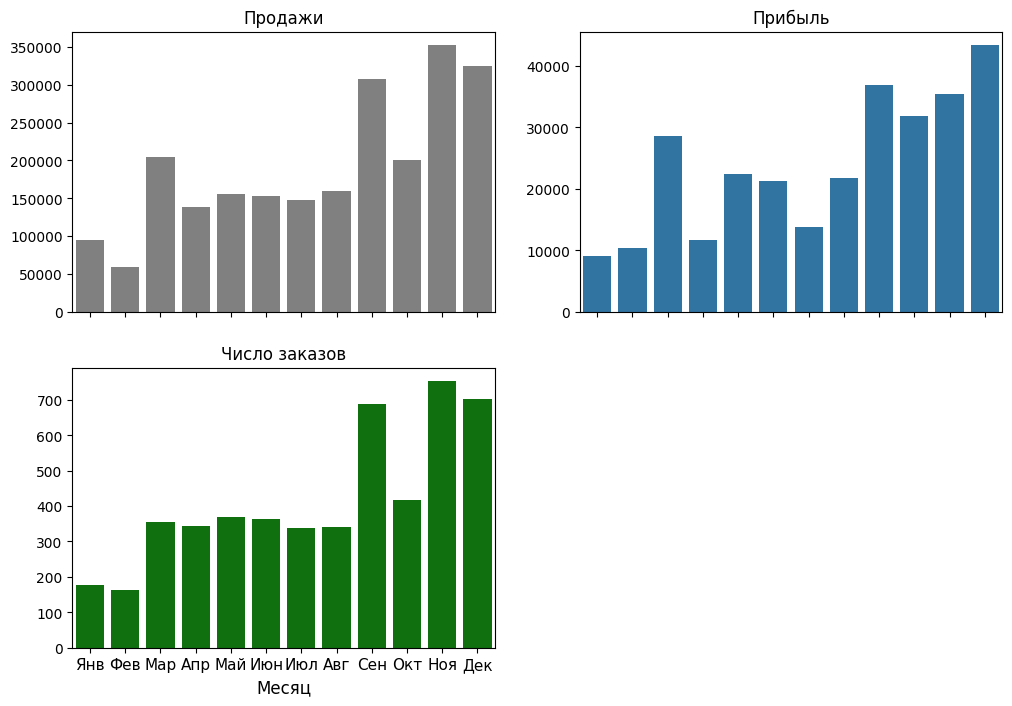

In [57]:
fig_season_months, axs_season_months = plt.subplots(2, 2, figsize=(12, 8), sharex=True) # Создаем подграфики
ax_season_sales, ax_season_profit, ax_season_orders, ax_empty = axs_season_months.flatten() # распаковываем оси

# 1 график (0,0)
sns.barplot(data=df_season_months, x='order_month', y='sales', ax=ax_season_sales, color='grey')
ax_season_sales.set_title('Продажи')
ax_season_sales.set_ylabel(None)

# 2 график (0,1)
sns.barplot(data=df_season_months, x='order_month', y='profit', ax=ax_season_profit)
ax_season_profit.set_title('Прибыль')
ax_season_profit.set_ylabel(None)

# 3 график (1,0)
sns.barplot(data=df_season_months, x='order_month', y='total_orders', ax=ax_season_orders, color='green')
ax_season_orders.set_title('Число заказов')
ax_season_orders.set_ylabel(None)
ax_season_orders.set_xlabel('Месяц', fontsize=12)

ax_season_orders.set_xticks(range(0,12)) # количество рисков
ax_season_orders.set_xticklabels(month_labels, fontsize=11) # наименования рисков

# Последнее место (1,1) отключаем
ax_empty.axis('off');

### 4.7 Изменение

В этом задании необходимо агрегировать ключевые метрики по годам и рассчитать изменение прибыли относительно предыдущего года.

**Шаг 1**  
Сформируйте датафрейм **`df_profit_years`**, в котором для каждого года рассчитаны суммарные показатели.

Для каждого года необходимо посчитать:
- суммарные продажи (`sales`);
- суммарную прибыль (`profit`);
- общее количество заказов.

*Требования*:
- используйте датафрейм `df_metrics_year`;
- выполните группировку по колонке `order_year`;
- колонка `order_year` **не должна быть индексом**;
- колонку с количеством заказов переименуйте в `total_orders`.

<details>
<summary><b>Подсказка</b></summary>

Для решения задачи:
- выполните `groupby()` по колонке `order_year` с параметром `as_index=False`;
- примените метод `agg()` для расчёта сумм `sales`, `profit` и `count_orders`;
- используйте `rename()` для переименования колонки `count_orders` в `total_orders`;
- сохраните результат в датафрейм `df_profit_years`.

</details>

In [58]:
# Анализируем продажи, прибыль и общее число заказов по годам
df_profit_years= (
    df_metrics_year
        .groupby('order_year', as_index=False)
        .agg({'sales':'sum', 'profit':'sum', 'count_orders':'sum'})
        .rename(columns={'count_orders':'total_orders'})
)

**Шаг 2** 
Добавьте в датафрейм **`df_profit_years`** колонку **`diff_profit`**, отражающую изменение прибыли относительно предыдущего года.

*Требования:*
- изменение прибыли рассчитывается как разность:
- для первого года заполните пропуск значением `0`;
- приведите колонку `diff_profit` к целочисленному типу (`int`).

<details>
<summary><b>Подсказка</b></summary>

Для расчёта изменения прибыли:
- используйте метод `shift(1)` для получения прибыли предыдущего года;
- вычтите сдвинутые значения из текущих;
- заполните пропуски с помощью `fillna(0)`;
- приведите результат к типу `int` с помощью `astype(int)`.

</details>

In [59]:
# Добавляем колонку с изменением прибыли
df_profit_years['diff_profit'] = (
    (df_profit_years['profit'] - df_profit_years['profit'].shift(1))
    .fillna(0)
    .astype(int)
)

### 4.8 Столбчатые диаграммы (Часть 2)

Постройте столбчатую диаграмму изменения прибыли по годам.

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика, вызвав функцию `create_fig()`  
   и сохраните результат в переменные:
   - `fig_profit_years`
   - `ax_profit_years`

2. С помощью `sns.barplot()` постройте столбчатую диаграмму:
   - данные: `df_profit_years`
   - ось X: `order_year`
   - ось Y: `diff_profit`
   - ось для построения: `ax_profit_years`
   - цвет столбцов: `violet`

3. Добавьте заголовок графика:
   - текст: **«Изменение прибыли по годам, $»**
   - цвет заголовка: `green`
   - размер шрифта: `16`

4. Установите подписи осей:
   - подпись оси X: **«Год»**
   - подпись оси Y отключите (установите `None`)

5. Для оси Y:
   - включите minor ticks
   - добавьте сетку с прозрачностью `alpha=0.2`

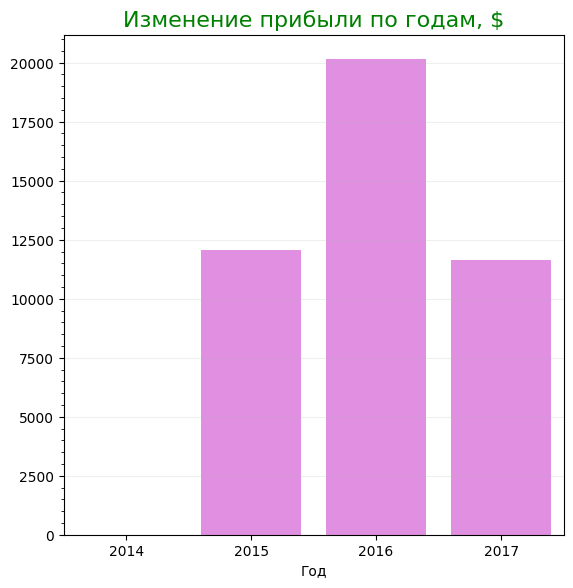

In [60]:
fig_profit_years, ax_profit_years = create_fig()
sns.barplot(data=df_profit_years, x='order_year', y='diff_profit', ax=ax_profit_years, color='violet')

ax_profit_years.set_title('Изменение прибыли по годам, $', fontsize=16, color='green')
ax_profit_years.set_ylabel(None)
ax_profit_years.set_xlabel('Год')

ax_profit_years.yaxis.minorticks_on();
ax_profit_years.yaxis.grid(alpha=0.2)

### 4.9 Медиана

В этом задании вы рассчитаете **медианные продажи** по дням недели и подготовите результат для дальнейшей визуализации/анализа.

**Шаг 1**

Сформируйте датафрейм `df_sales_dow`, в котором для каждого дня недели рассчитано **медианное значение продаж**.

Требования:
- выполните группировку по колонке `order_dow`;
- посчитайте медиану по колонке `sales`;
- колонку `order_dow` **не оставляйте индексом** — она должна быть обычной колонкой.

<details>
<summary><b>Подсказка</b></summary>

Для решения можно действовать так:

- используйте `groupby()` по колонке `order_dow` и укажите `as_index=False`, чтобы `order_dow` осталась колонкой;
- примените `agg()` и задайте агрегацию медианой для `sales` (например, `'median'`);
- сохраните результат в `df_sales_dow`.

</details>

In [61]:
# продажи по дням недели
df_sales_dow = df.groupby('order_dow', as_index=False).agg({'sales':'median'})

**Шаг 2**

Округлите значения продаж в колонке `sales` датафрейма `df_sales_dow` **до двух знаков после запятой**.

<details>
<summary><b>Подсказка</b></summary>

- у Series есть метод `round(2)`, который округляет значения до 2 знаков после запятой;
- результат можно перезаписать в ту же колонку `sales` датафрейма `df_sales_dow`.

</details>

In [62]:
# окгругляем продажи до двух знаков
df_sales_dow['sales'] = df_sales_dow['sales'].round(2)

### 4.10 Скользящее среднее
Рассчитайте скользящее среднее продаж.

В датафрейме `df_metrics_year` создайте новую колонку  
`mean_sales_12months`, в которой отразите **скользящее среднее продаж за 12 месяцев**.

Требования:
- использовать колонку `sales`
- размер окна: `12`
- метод: `rolling().mean()`

In [63]:
# скользящее среднее за 12 месяцев
df_metrics_year['mean_sales_12months'] = df_metrics_year['sales'].rolling(window=12).mean()

### 4.11 Линейные диаграммы (Часть 3)

Визуализация продаж и 12-месячного скользящего среднего.

Постройте линейный график, который одновременно отображает:
- фактические продажи по месяцам;
- 12-месячное скользящее среднее продаж.

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика, вызвав функцию `create_fig(12, 6)`.  
   Сохраните результат в переменные `fig_mean_12months` и `ax_mean_12months`.

2. С помощью `sns.lineplot` постройте линейный график продаж:
   - данные: `df_metrics_year`
   - ось X: `period`
   - ось Y: `sales`
   - ось: `ax_mean_12months`
   - подпись линии: `Продажи`
   - толщина линии: `2`

3. На той же оси постройте линию 12-месячного скользящего среднего:
   - данные: `df_metrics_year`
   - ось X: `period`
   - ось Y: `mean_sales_12months`
   - подпись линии: `12-месячное скользящее среднее`
   - прозрачность линии: `0.7`

4. Добавьте оформление графика:
   - заголовок: **«Продажи и 12-месячное скользящее среднее»**
   - подпись оси X: `Период`
   - подпись оси Y отключите
   - включите минорные тики по оси Y
   - включите сетку с прозрачностью `0.3`

5. Настройте формат оси X:
   - основной шаг — раз в 6 месяцев
   - формат даты: `Месяц Год` (например, `Jan 2016`)

Примечание: для выполнения шага 5 используйте matplotlib.dates as `mdates`. Воспользуйтесь нейросетями)

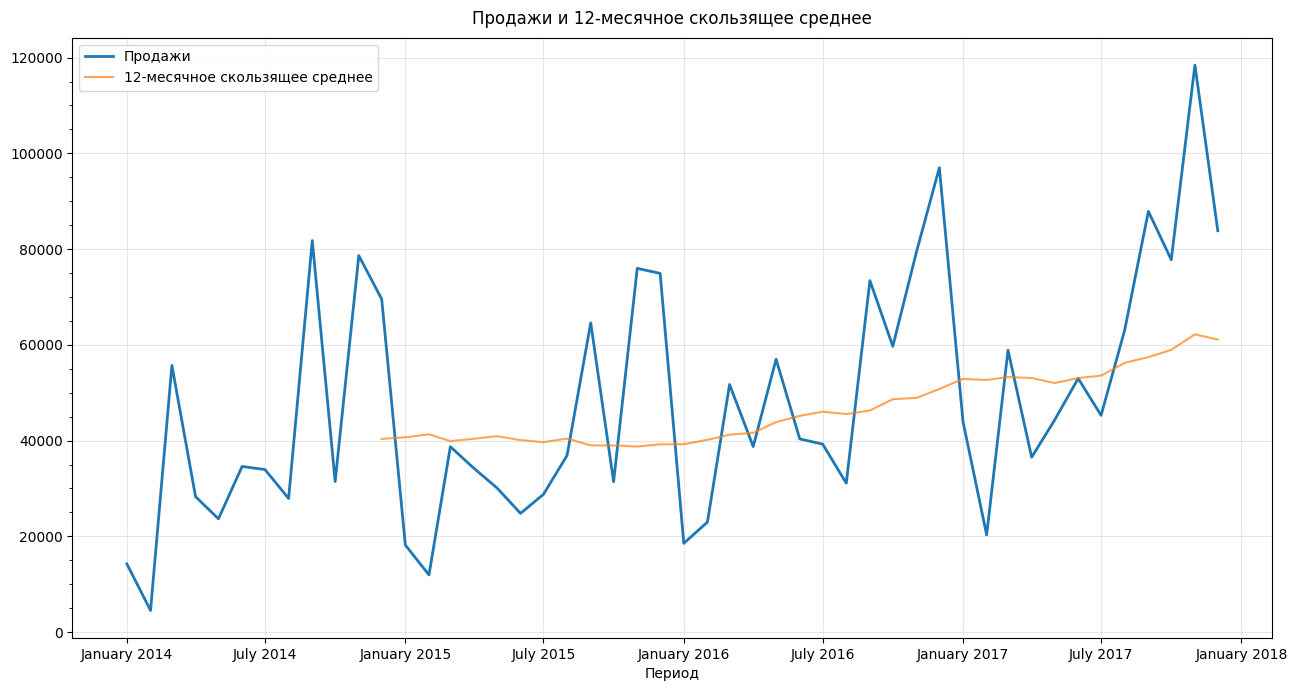

In [64]:
# график скользящего среднего за 12 месяцев по продажам
fig_mean_12months, ax_mean_12months = create_fig(12,6)
sns.lineplot(data=df_metrics_year, x='period', y='sales', 
             ax=ax_mean_12months, label='Продажи', linewidth=2)
sns.lineplot(data=df_metrics_year, x='period', y='mean_sales_12months',
             ax=ax_mean_12months, label='12-месячное скользящее среднее', alpha=0.7)

ax_mean_12months.set_title('Продажи и 12-месячное скользящее среднее', pad=10)
ax_mean_12months.set_xlabel('Период')
ax_mean_12months.set_ylabel(None)
ax_mean_12months.yaxis.minorticks_on()
ax_mean_12months.grid(alpha=0.3)

ax_mean_12months.xaxis.set_major_locator(mdates.MonthLocator(interval=6)) # По кварталам
ax_mean_12months.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'));

### 4.12 Сводная таблица

Постройте сводную таблицу, в которой будут отражены продажи по месяцам для каждого года.

Для этого выполните следующие шаги:

1. Используя датафрейм `df_metrics_year`, создайте сводную таблицу с помощью метода `pivot_table`.

2. Задайте параметры сводной таблицы:
   - индекс: `order_year` (годы);
   - колонки: `order_month` (месяцы);
   - значения: `sales`;
   - функция агрегации: сумма (`sum`).

3. Сохраните результат в переменную `sales_year_months`.

In [65]:
# Сводная таблица, где продажи - значения, индекс - год, а колонки - месяц
sales_year_months = (
    df_metrics_year.pivot_table(index='order_year', columns='order_month', values='sales', aggfunc='sum')
)

### 4.13 Тепловая карта

Постройте тепловую карту, отражающую уровень продаж по месяцам для каждого года.

Для этого выполните следующие шаги:

1. Создайте фигуру и ось для графика, вызвав функцию  
   `create_fig(12, 6)`,  
   и сохраните результат в переменные `fig_sales_year_months` и `ax_sales_year_months`.

2. Используя `sns.heatmap`, постройте тепловую карту на основе таблицы `sales_year_months` со следующими параметрами:
   - цветовая схема: `YlOrRd`;
   - отображение значений в ячейках: `annot=True`;
   - формат чисел: без знаков после запятой (`fmt='.0f'`);
   - толщина линий между ячейками: `linewidths=3`;
   - цвет линий: `gray`;
   - ось для построения: `ax_sales_year_months`.

3. Добавьте заголовок графика:  
   **«Тепловая карта продаж по месяцам и годам»**,  
   размер шрифта — `16`, отступ — `5`.

4. Подпишите оси:
   - ось X — **«Месяц»** (размер шрифта `12`);
   - ось Y — **«Год»** (размер шрифта `12`).

5. Настройте подписи оси X:
   - задайте 12 делений;
   - используйте список `month_labels` для отображения названий месяцев;
   - установите размер шрифта подписей равным `11`.

В результате должен получиться наглядный график, позволяющий визуально сравнить сезонность и динамику продаж по годам и месяцам.

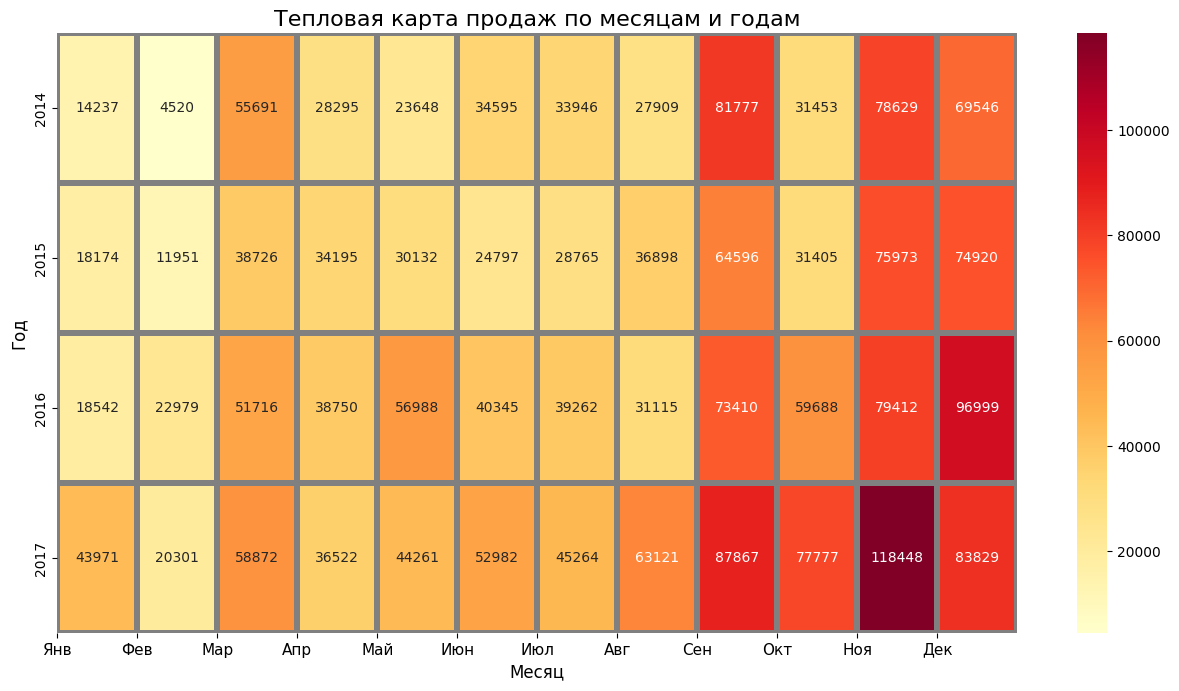

In [66]:
# Строим heatmap
fig_sales_year_months, ax_sales_year_months = create_fig(12,6)
sns.heatmap(
    sales_year_months,
    cmap='YlOrRd',        # тёплая цветовая схема
    annot=True,           # выводить значения в ячейках
    fmt='.0f',            # формат чисел без знаков после запятой
    linewidths=3,
    linecolor='gray',
    ax=ax_sales_year_months
)

ax_sales_year_months.set_title('Тепловая карта продаж по месяцам и годам', fontsize=16, pad=5)
ax_sales_year_months.set_xlabel('Месяц', fontsize=12)
ax_sales_year_months.set_ylabel('Год', fontsize=12)

ax_sales_year_months.set_xticks(range(0,12)) # количество рисков
ax_sales_year_months.set_xticklabels(month_labels, fontsize=11); # наименования рисков;

## 5. RFM анализ

### 5.1 Расчет показателей RFM

Расчёт показателей RFM (Frequency, Monetary, Recency)

В этом задании вы рассчитаете базовые показатели **RFM-анализа** для клиентов:
- **Frequency (F)** — количество заказов;
- **Monetary (M)** — суммарную выручку;
- **Recency (R)** — количество дней с момента последнего заказа.

**Шаг 1.**

Определите дату, относительно которой будет рассчитываться показатель **Recency** — количество дней с момента последней покупки клиента.

В качестве даты отсчёта используйте **последний день, представленный в данных, увеличенный на один день**.

**Требования:**
- найдите максимальную дату заказа в колонке `order_date`;
- прибавьте к ней один день;
- сохраните результат в переменную `counting_day`.

<details>
<summary><strong>Подсказка</strong></summary>

Для решения задачи:
- используйте метод `.max()` для поиска максимальной даты;
- прибавьте один день с помощью `pd.Timedelta(days=1)`;
- сохраните результат в отдельную переменную.

</details>

In [67]:
# день отсчета
counting_day = df['order_date'].max() + pd.Timedelta(days=1) 

**Шаг 2.**

Сгруппируйте данные по клиентам и рассчитайте ключевые показатели **Frequency** и **Monetary**, а также дату последнего заказа клиента.

**Для каждого клиента необходимо получить:**
- количество уникальных заказов (**Frequency**);
- суммарную выручку (**Monetary**);
- дату последнего заказа.

**Требования:**
- группировка выполняется по колонке `customer_id`;
- количество заказов рассчитайте как число уникальных `order_id`;
- суммарную выручку рассчитайте по колонке `sales`;
- дату последнего заказа определите как максимальную `order_date`;
- сохраните результат в датафрейм `rfm`;
- переименуйте колонки:
  - `order_id` → `count_orders`;
  - `order_date` → `last_date`.

<details>
<summary><strong>Подсказка</strong></summary>

Для решения задачи:
- используйте `groupby()` по колонке `customer_id` с параметром `as_index=False`;
- примените метод `agg()` для расчёта:
  - `max` — для даты последнего заказа,
  - `nunique` — для количества заказов,
  - `sum` — для выручки;
- переименуйте колонки с помощью `rename()`.

</details>

In [68]:
# таблица rfm
rfm = (
    df
    .groupby('customer_id', as_index=False)
    .agg({'order_date':'max', 'order_id':'nunique', 'sales':'sum'})
    .rename(columns={'order_id':'count_orders','order_date':'last_date'})
)

**Шаг 3.**

На этом шаге необходимо рассчитать показатель **Recency (R)** — количество дней, прошедших с момента последнего заказа каждого клиента.

**Для каждого клиента необходимо:**
- вычислить разницу между датой отсчёта `counting_day` и датой последнего заказа `last_date`;
- сохранить результат в новой колонке `days_have_passed`;
- привести результат к числовому формату (в днях).

В результате в датафрейме `rfm` должны присутствовать показатели:
- **F** — `count_orders`,
- **M** — `sales`,
- **R** — `days_have_passed`.

<details>
<summary><strong>Подсказка</strong></summary>

Для расчёта Recency:
- вычтите колонку `last_date` из переменной `counting_day`;
- полученную разницу дат переведите в количество дней с помощью `.dt.days`;
- сохраните результат в новую колонку `days_have_passed`

In [69]:
# количество прошедших дней с момента последней покупки
rfm['days_have_passed'] = (counting_day - rfm['last_date']).dt.days

### 5.2 Гистограммы распределения (Необязательный пункт)

**Шаг 1**

Постройте гистограмму распределения **Recency** (столбец `days_have_passed`) из датафрейма `rfm`.

Требования:
- создайте фигуру и ось через `create_fig(x=10, y=5)`;
- используйте `sns.histplot()`:
  - данные: `rfm`
  - столбец: `days_have_passed`
  - `bins=30`
  - `color='lightblue'`
- ограничьте ось X значениями **от 0 и выше**;
- оформите график:
  - заголовок: `Распределение давности покупок`
  - подпись X: `Число пройденных дней`
  - подпись Y: `Число покупателей`

<details>
<summary><b>Подсказка</b></summary>

- Создайте ось: `fig_recency, ax_recency = create_fig(x=10, y=5)`.
- Постройте гистограмму через `sns.histplot(..., ax=ax_recency)`.
- Чтобы убрать отрицательные значения по X, используйте `ax_recency.set_xlim(left=0)`.
- Подписи и заголовок задаются методами `set_title()`, `set_xlabel()`, `set_ylabel()`.

</details>

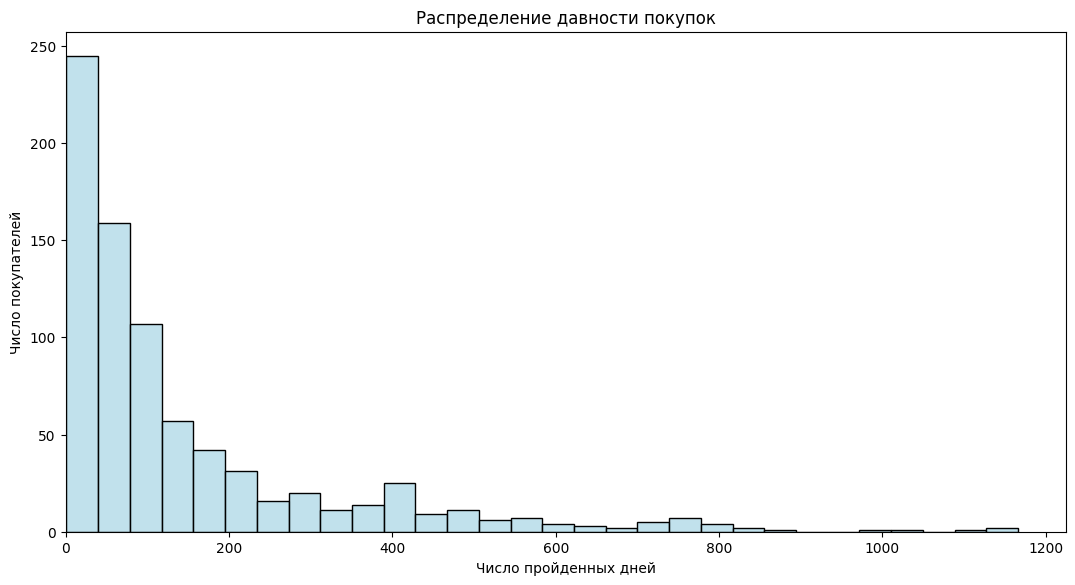

In [70]:
# гистограмма recency
fig_recency, ax_recency = create_fig(x=10, y=5)
sns.histplot(data=rfm, x='days_have_passed', ax=ax_recency, bins=30, color='lightblue')

ax_recency.set_xlim(left=0)
ax_recency.set_title('Распределение давности покупок')
ax_recency.set_ylabel('Число покупателей')
ax_recency.set_xlabel('Число пройденных дней');

**Шаг 2**

Постройте гистограмму распределения **Frequency** (столбец `count_orders`) из датафрейма `rfm`.

Требования:
- создайте фигуру и ось через `create_fig(x=10, y=5)`;
- используйте `sns.histplot()`:
  - данные: `rfm`
  - столбец: `count_orders`
  - число бинов: `rfm['count_orders'].max() - 1`
  - `color='lightgreen'`
- ограничьте ось X значениями **от 0 и выше**;
- установите тики по оси X с шагом 1 (от 0 до максимального числа заказов);
- включите minor ticks по оси Y;
- оформите график:
  - заголовок: `Распределение частоты покупок`
  - подпись X: `Число заказов`
  - подпись Y: `Число покупателей`

<details>
<summary><b>Подсказка</b></summary>

- Число бинов можно задать так: `bins = rfm['count_orders'].max() - 1`.
- Тики по оси X удобно сделать через:
  `ax_frequency.set_xticks(range(0, rfm['count_orders'].max() + 1, 1))`.
- Для оси X используйте `ax_frequency.set_xlim(left=0)`.
- Minor ticks по Y: `ax_frequency.yaxis.minorticks_on()`.

</details>

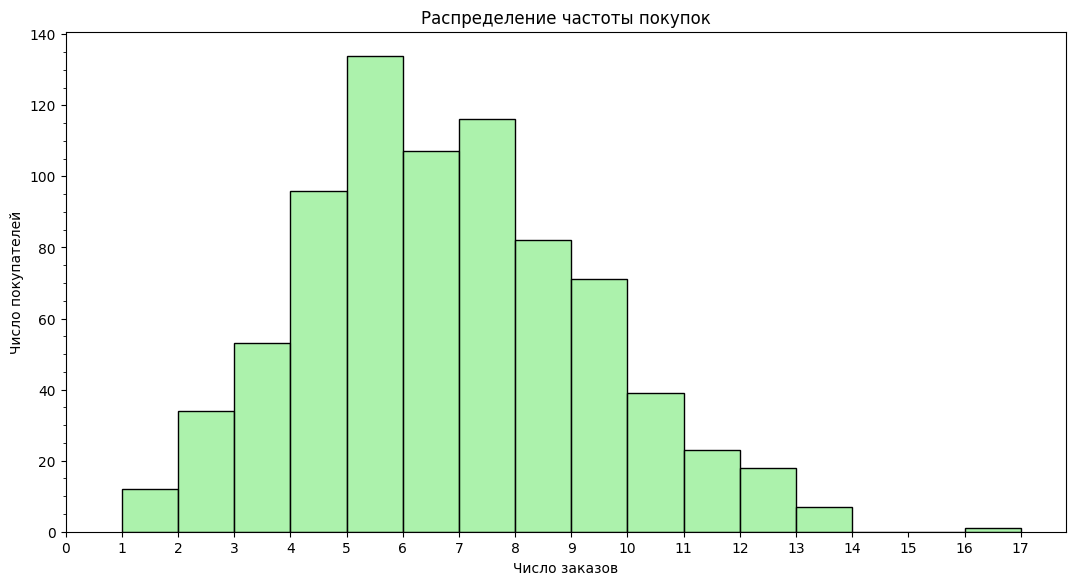

In [71]:
# Гистограмма frequency
fig_frequency, ax_frequency = create_fig(x=10, y=5)
sns.histplot(data=rfm, x='count_orders', ax=ax_frequency, bins=rfm['count_orders'].max()-1, color='lightgreen')

ax_frequency.set_xlim(left=0)
ax_frequency.set_xticks(range(0, rfm['count_orders'].max()+1,1)) # Тики по оси х с шагом 1
ax_frequency.yaxis.minorticks_on()

ax_frequency.set_title('Распределение частоты покупок')
ax_frequency.set_ylabel('Число покупателей')
ax_frequency.set_xlabel('Число заказов');

**Шаг 3**

Постройте гистограмму распределения **Monetary** (столбец `sales`) из датафрейма `rfm`.

Требования:
- создайте фигуру и ось через `create_fig(x=10, y=5)`;
- используйте `sns.histplot()`:
  - данные: `rfm`
  - столбец: `sales`
  - `bins=40`
  - `color='beige'`
- ограничьте ось X значениями **от 0 и выше**;
- включите minor ticks по оси Y;
- оформите график:
  - заголовок: `Распределение выручки`
  - подпись X: `Общая выручка`
  - подпись Y: `Число покупателей`

<details>
<summary><b>Подсказка</b></summary>

- Создайте ось: `fig_monetary, ax_monetary = create_fig(x=10, y=5)`.
- Постройте гистограмму через `sns.histplot(..., bins=40, ax=ax_monetary)`.
- Ограничьте X снизу: `ax_monetary.set_xlim(left=0)`.
- Minor ticks по Y: `ax_monetary.yaxis.minorticks_on()`.

</details>

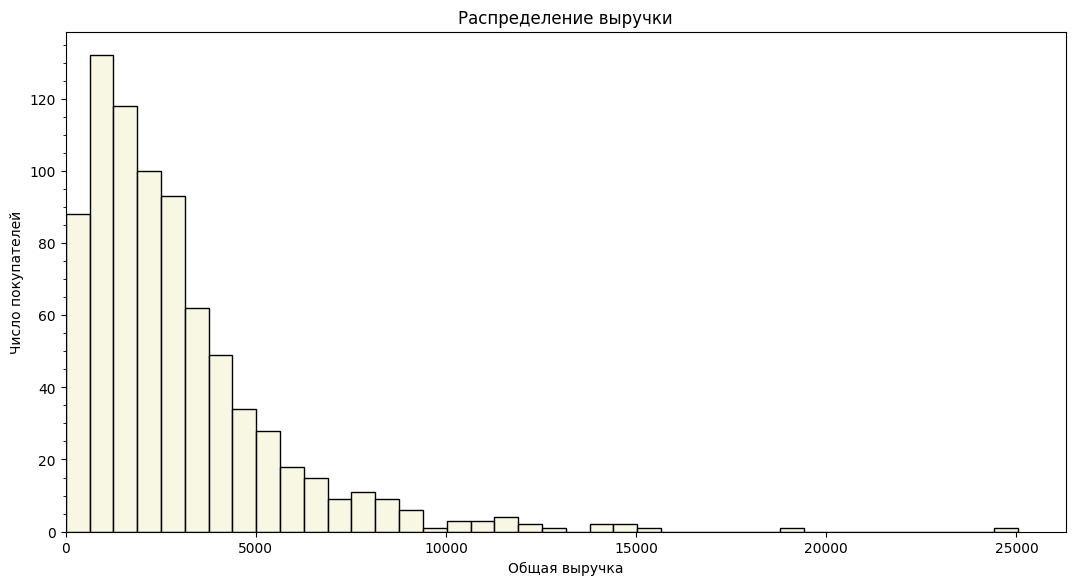

In [72]:
# Гистограмма monetary
fig_frequency, ax_monetary = create_fig(x=10, y=5)
sns.histplot(data=rfm, x='sales', ax=ax_monetary, bins=40, color='beige')
ax_monetary.yaxis.minorticks_on()

ax_monetary.set_xlim(left=0)
ax_monetary.set_title('Распределение выручки')
ax_monetary.set_ylabel('Число покупателей')
ax_monetary.set_xlabel('Общая выручка');

### 5.3 Формирование RFM-кодов

**Шаг 1.**

Разбейте клиентов на **три категории (от 1 до 3)** по каждой из метрик.

#### Recency (R)
- используйте колонку `days_have_passed`;
- примените квантильное разбиение `pd.cut`;
- границы квантилей: `[0, 0.2, 0.5, 1]`;
- метки: `[3, 2, 1]` (меньше дней → выше R).

#### Frequency (F)
- используйте колонку `count_orders`;
- границы квантилей: `[0, 0.5, 0.8, 1]`;
- метки: `[1, 2, 3]`.

#### Monetary (M)
- используйте колонку `sales`;
- границы квантилей: `[0, 0.5, 0.8, 1]`;
- метки: `[1, 2, 3]`.

Результаты сохраните в колонках `R`, `F`, `M` датафрейма `rfm`.

<details>
<summary><b>Подсказка</b></summary>

- используйте функцию `pd.qcut()` с параметром `q`;
- для Recency применяйте обратный порядок меток;
- создавайте новые колонки напрямую в датафрейме `rfm`.

</details>

In [73]:
# Recency сегменты
rfm['R'] = pd.qcut(
    rfm['days_have_passed'],
    q=[0, 0.2, 0.5, 1],
    labels=[3, 2, 1] # в обратном порядке
)

# Frequency сегменты
rfm['F'] = pd.qcut(
    rfm['count_orders'],
    q=[0, 0.5, 0.8, 1],
    labels=[1, 2, 3]
)

# Monetary сегменты
rfm['M'] = pd.qcut(
    rfm['sales'],
    q=[0, 0.5, 0.8, 1],
    labels=[1, 2, 3]
)

**Шаг 2.**

Сформируйте итоговый **RFM-код** для каждого клиента на основе рассчитанных сегментов  
`R`, `F` и `M`.

RFM-код представляет собой строку из трёх цифр в порядке:

**R → F → M**

Примеры RFM-кодов:
- `111`
- `332`
- `213`

#### Требования:
- используйте колонки `R`, `F` и `M`;
- объедините значения в одну строку, приведя их к строковому типу;
- сохраните результат в новой колонке `rfm_code`.

<details>
<summary><b>Подсказка</b></summary>

Для формирования RFM-кода:
- используйте метод `.astype(str)` для преобразования типов;
- объедините значения с помощью оператора `+`;
- результат сохраните в колонку `rfm_code`.

</details>


In [74]:
# RFM-код
rfm['rfm_code'] = (
    rfm['R'].astype(str) +
    rfm['F'].astype(str) +
    rfm['M'].astype(str)
)

### 5.4 Назначение клиентских сегментов на основе RFM-кодов

В этом пункте вам необходимо присвоить каждому клиенту итоговый **клиентский сегмент** на основе ранее рассчитанного `rfm_code`.

Словарь соответствия RFM-кодов и названий сегментов **уже задан** и доступен в ноутбуке (переменная `segment_map`).

#### Задача:
1. Используйте колонку `rfm_code` датафрейма `rfm`.
2. С помощью словаря `segment_map` сопоставьте каждому RFM-коду его сегмент.
3. Результат запишите в новую колонку `segment`.

📌 **Подсказка:**  
Для сопоставления значений по словарю можно использовать метод `map()`.

In [75]:
# делим на сегменты
segment_map = {
    "333": "Активные",

    "131": "Лояльные", "132": "Лояльные",
    "231": "Лояльные", "232": "Лояльные",
    "321": "Лояльные", "322": "Лояльные",
    "331": "Лояльные", "332": "Лояльные",

    "123": "Постоянные", "133": "Постоянные",
    "213": "Постоянные", "223": "Постоянные",
    "233": "Постоянные", "323": "Постоянные",

    "121": "Неактивные", "122": "Неактивные",
    "211": "Неактивные", "212": "Неактивные",
    "221": "Неактивные", "222": "Неактивные",

    "311": "Свежие", "312": "Свежие", "313": "Свежие",

    "111": "Потерянные", "112": "Потерянные", "113": "Потерянные",
}

In [76]:
# присвоение сегмента
rfm['segment'] = rfm['rfm_code'].map(segment_map)
display(rfm)

,customer_id,last_date,count_orders,sales,days_have_passed,R,F,M,rfm_code,segment
0,AA-10315,2017-06-29,5,5563.560,185,1,1,3,113,Потерянные
1,AA-10375,2017-12-11,9,1056.390,20,3,3,1,331,Лояльные
2,AA-10480,2017-04-15,4,1790.512,260,1,1,1,111,Потерянные
3,AA-10645,2017-11-05,6,5086.935,56,2,1,3,213,Постоянные
4,AB-10015,2016-11-10,3,886.156,416,1,1,1,111,Потерянные
...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,2017-11-17,11,2374.658,44,2,3,2,232,Лояльные
789,YC-21895,2017-12-26,5,5454.350,5,3,1,3,313,Свежие
790,YS-21880,2017-12-21,8,6720.444,10,3,2,3,323,Постоянные
791,ZC-21910,2017-11-06,13,8025.707,55,2,3,3,233,Постоянные


## 6. Когортный анализ

### 6.1 Период заказа

Создайте колонку `order_period_m`, отражающую период заказа с точностью до **месяца**.

Для этого:
- используйте колонку `order_date`;
- преобразуйте дату в месячный период.

<details>
<summary><b>Подсказка</b></summary>

Для преобразования даты в период используйте метод:

- `dt.to_period('M')` — для получения месячного периода.

Метод `to_period()` позволяет работать с датами на уровне месяцев, кварталов или дней, что удобно для агрегирования данных во временных разрезах.
</details>

In [77]:
# период заказа (до месяца)
df['order_period_m'] = df['order_date'].dt.to_period('M')

### 6.2 Определение когорты клиента

Когорта клиента — это период его **первого заказа**.
На этом шаге необходимо определить, к какой когорте относится каждый клиент.

Для каждого клиента определите:
- месяц первого заказа;
- день первого заказа.

Для этого:
- сгруппируйте данные по `customer_id`;
- найдите минимальное значение:
  - `order_period_m` — для определения месяца первого заказа;
  - `order_date` — для определения дня первого заказа;
- сохраните результаты:
  - месяц первого заказа в колонку `cohort_m`;
  - день первого заказа в колонку `cohort_d`.

Размер датафрейма при этом должен остаться неизменным.

<details>
<summary><b>Подсказка</b></summary>

Чтобы сохранить количество строк в датафрейме, используйте метод:

- `groupby(...).transform('min')`

Метод `transform()` возвращает результат той же длины, что и исходный датафрейм, что позволяет добавить информацию о когорте к каждой строке заказа.
</details>

In [78]:
# первое касание (месяц) клиентов
# первое касание (день) клиентов
df['cohort_m'] = df.groupby('customer_id')['order_period_m'].transform('min')
df['cohort_d'] = df.groupby('customer_id')['order_date'].transform('min')

### 6.3 Возраст когорты

На этом шаге необходимо определить **возраст когорты** — сколько времени прошло с момента первого заказа клиента до каждого последующего заказа.

Возраст когорты используется для анализа поведения клиентов во времени и сравнения когорт между собой.

#### Задача

Для каждого заказа рассчитайте возраст когорты в **месяцах**.

Для этого:
- вычислите разницу между датой заказа `order_date` и датой первого заказа клиента `cohort_d`;
- переведите разницу в количество дней;
- преобразуйте количество дней в приближённое количество месяцев, разделив результат на 30 с использованием целочисленного деления;
- сохраните результат в новой колонке `num_period_cohort_m`.

В результате в датафрейме должна появиться новая колонка:
- `num_period_cohort_m` — возраст когорты в месяцах.

<details>
<summary><b>Подсказка</b></summary>

Для расчёта возраста когорты:

- вычислите разницу между датами и переведите разницу в количество дней с помощью .dt.days;
- для приближённого перевода дней в месяцы разделите результат на 30 с использованием целочисленного деления.

</details> 

In [79]:
# Количество тридцати дней
df['num_period_cohort_m'] = (df['order_date'] - df['cohort_d']).dt.days // 30

### 6.4 Формирование когортной таблицы

На этом этапе необходимо агрегировать данные по когортам и номеру периода, а затем сформировать сводную таблицу для когортного анализа.

**Шаг 1.** Агрегация клиентов по когортам и периодам

Сгруппируйте данные по когорте и номеру периода жизни когорты (в месяцах).

**Задача:**
- выполните группировку по колонкам `cohort_m` и `num_period_cohort_m`;
- посчитайте количество уникальных клиентов (`customer_id`) в каждой группе;
- назовите колонку с количеством клиентов `count_customers`;
- сбросьте индекс;
- сохраните результат в датафрейм `df_coh`;

In [80]:
# агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_coh = df.groupby(['cohort_m', 'num_period_cohort_m']).agg(count_customers=('customer_id', 'nunique')).reset_index()

**Шаг 2.** Построение когортной сводной таблицы

Создайте сводную таблицу для когортного анализа.

**Задача:**
- используйте датафрейм `df_coh`;
- в качестве индекса задайте `cohort_m`;
- в качестве колонок — `num_period_cohort_m`;
- в качестве значений — `count_customers`;
- сохраните результат в переменную `pivot_coh`.

In [81]:
# создаем сводную таблицу для когортного анализа
pivot_coh = df_coh.pivot_table(index='cohort_m', columns='num_period_cohort_m', values='count_customers')

### 6.5 Расчёт коэффициентов удержания (Retention)

На этом этапе необходимо рассчитать коэффициенты удержания клиентов для каждой когорты.

Коэффициент удержания показывает, какая доля клиентов из первоначальной когорты
осталась активной в каждом последующем периоде.

**Шаг 1.**

Для каждой когорты определите её первоначальный размер — количество клиентов в первый период (нулевой месяц).

**Задача:**
- возьмите первый столбец сводной когортной таблицы `pivot_coh`;
- сохраните его в переменную `first_col`.

In [82]:
# Первый столбец 
first_col = pivot_coh[0]

**Шаг 2.**

Рассчитайте матрицу удержания клиентов.

**Задача:**
- разделите каждое значение в таблице `pivot_coh` на размер соответствующей когорты (`first_col`);
- деление выполните по строкам (для каждой когорты отдельно);
- сохраните результат в переменную `matrix_ret`.

<details>
<summary><b>Подсказка</b></summary>

Для расчёта коэффициентов удержания:

- используйте метод `divide()` для поэлементного деления значений;
- в качестве делителя передайте вектор размеров когорт `first_col`;
- выполняйте деление **по строкам** (для каждой когорты отдельно), указав параметр `axis=0`;
- сохраните результат в отдельную таблицу коэффициентов удержания `matrix_ret`.

В результате каждая ячейка будет показывать долю клиентов,
оставшихся активными относительно размера своей когорты в нулевой период.
</details>

In [83]:
# Вычисляем коэффициенты удержания, деля на размер когорты
matrix_ret = pivot_coh.divide(first_col, axis=0)

### 6.6 Тепловая карта удержания

На этом шаге вы визуализируете матрицу удержания `matrix_ret` в виде тепловой карты.

---

#### 6.6.1 Подготовьте фигуру для графика

1. Создайте фигуру и ось через вашу функцию `create_fig()`:
   - ширина: `16`
   - высота: `9`
2. Сохраните результат в переменные:
   - `fig_hm_ret`
   - `ax_hm_ret`

---

#### 6.6.2 Постройте тепловую карту через `sns.heatmap()`

Вызовите `sns.heatmap()` и укажите параметры:

1. **data**
   - `matrix_ret.iloc[:, :24]`

2. **annot**
   - `annot=True` — чтобы значения отображались внутри ячеек

3. **cmap**
   - `cmap="RdYlGn"` — градиент от красного к зелёному

4. **фиксируем шкалу цветов**
   - `vmin=0`
   - `vmax=1`
   Это гарантирует, что цвет всегда интерпретируется одинаково (0…1), даже если в данных нет 0 или 1.

5. **формат подписей в ячейках**
   - `fmt=".0%"` — вывод в процентах без десятичных

6. **размер текста аннотаций**
   - `annot_kws={"size": 10}` (можно 8–10)

7. **разделители между ячейками**
   - `linewidths=0.5`

8. **ось, куда рисуем**
   - `ax=ax_hm_ret`

9. **подпись цветовой шкалы**
   - `cbar_kws={"label": "Доля удержанных клиентов"}`

---

#### 6.6.3 Подпишите график (заголовок и оси)

После построения тепловой карты задайте подписи:

1. Заголовок:
   - `ax_hm_ret.set_title("Когортная тепловая карта удержания клиентов", fontsize=14)`

2. Подпись оси X:
   - `ax_hm_ret.set_xlabel("Период с момента первого заказа", fontsize=12)`

3. Подпись оси Y:
   - `ax_hm_ret.set_ylabel("Когорта (месяц первого заказа)", fontsize=12)`

---

#### 6.6.4 Сделайте подписи осей читаемыми

1. Уберите поворот подписей:
   - `ax_hm_ret.tick_params(axis="x", rotation=0)`
   - `ax_hm_ret.tick_params(axis="y", rotation=0)`

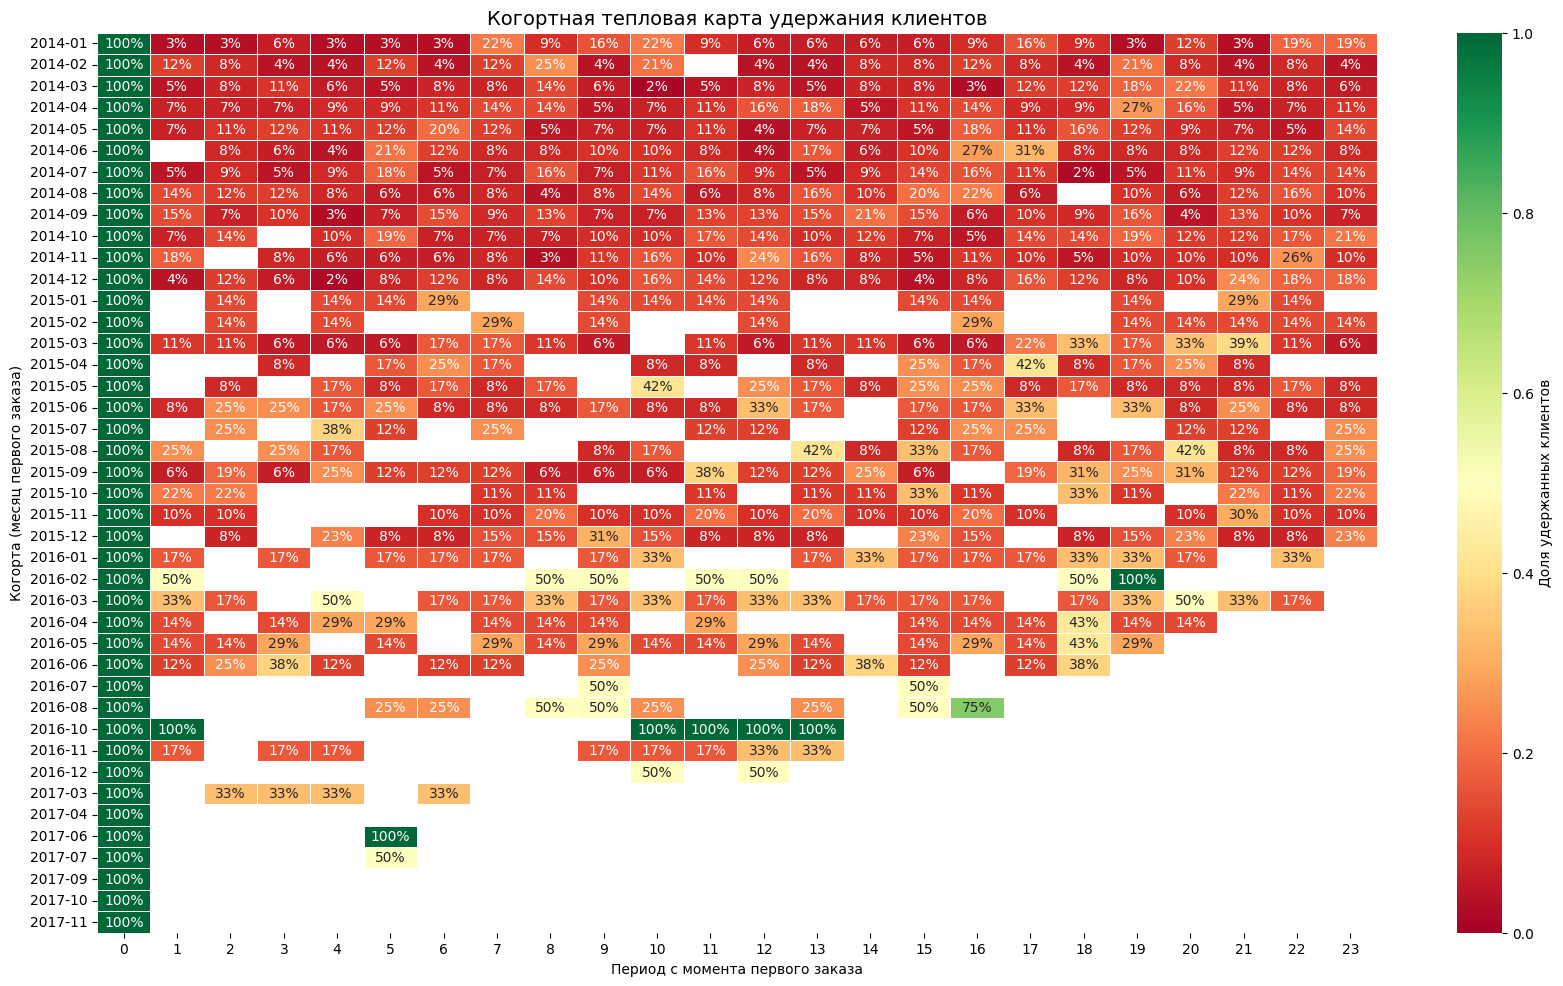

In [84]:
# строим тепловую карту
fig_hm_ret, ax_hm_ret = create_fig(16, 9)
sns.heatmap(
    matrix_ret.iloc[:, :24],
    annot=True,
    cmap='RdYlGn', 
    vmin=0, vmax=1,         # фиксируем шкалу 0..1
    fmt='.0%',
    annot_kws={'size': 10},
    linewidths=0.5,
    ax=ax_hm_ret,
    cbar_kws={'label': 'Доля удержанных клиентов'}
)

ax_hm_ret.set_title('Когортная тепловая карта удержания клиентов', fontsize=14)
ax_hm_ret.set_xlabel('Период с момента первого заказа')
ax_hm_ret.set_ylabel('Когорта (месяц первого заказа)')

# 4) Сделаем ось X читаемой
ax_hm_ret.tick_params(axis='x', rotation=0)
ax_hm_ret.tick_params(axis='y', rotation=0);

#### 6.6.5 
Выведите переменную `pivot_coh` и посмотрите внимательно на значения в нулевом периоде за все года

In [85]:
# переменная pivot_coh
display(pivot_coh)

num_period_cohort_m,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
cohort_m,,,,,,,,,,,,,,,,,,,,,
2014-01,32.0,1.0,1.0,2.0,1.0,1.0,1.0,7.0,3.0,5.0,...,4.0,4.0,5.0,1.0,3.0,7.0,10.0,6.0,9.0,1.0
2014-02,24.0,3.0,2.0,1.0,1.0,3.0,1.0,3.0,6.0,1.0,...,2.0,4.0,3.0,3.0,6.0,6.0,6.0,2.0,1.0,NaN
2014-03,65.0,3.0,5.0,7.0,4.0,3.0,5.0,5.0,9.0,4.0,...,13.0,11.0,7.0,17.0,12.0,13.0,17.0,4.0,NaN,NaN
2014-04,56.0,4.0,4.0,4.0,5.0,5.0,6.0,8.0,8.0,3.0,...,11.0,9.0,13.0,7.0,13.0,13.0,3.0,NaN,NaN,NaN
2014-05,56.0,4.0,6.0,7.0,6.0,7.0,11.0,7.0,3.0,4.0,...,10.0,13.0,10.0,14.0,11.0,4.0,NaN,NaN,NaN,NaN
2014-06,48.0,NaN,4.0,3.0,2.0,10.0,6.0,4.0,4.0,5.0,...,9.0,9.0,12.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN
2014-07,44.0,2.0,4.0,2.0,4.0,8.0,2.0,3.0,7.0,3.0,...,9.0,13.0,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,49.0,7.0,6.0,6.0,4.0,3.0,3.0,4.0,2.0,4.0,...,13.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,68.0,10.0,5.0,7.0,2.0,5.0,10.0,6.0,9.0,5.0,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
